- FERRAH ANISSA 202033018072
- BOUKHECHEM OUSSAMA 181831085840

# TP 1 Mesures de performance
Dans ce TP, nous aimerions avoir un premier aperçu sur les algorithmes d'apprentissage automatique. Plus précisément, nous aimerions évaluer leurs performances en utilisant les métriques suivantes:
- Matrice de conusion
- Rappel
- Précision
- Taux de FP
- Spécificité
- Courbe ROC

Les mesures devront être calculées sur la tâche de classification de nombres manuscrits.

Le travail consiste à implementer ces métriques et à les comparer avec les métriques des librairies disponibles.

Les algorithmes : K plus Proches Voisins devront être implementés.

# Importation des librairies necessaires au travail

In [1]:
import numpy as np
import cv2 
import pandas as pd
import matplotlib.pyplot as plt
from numpy import random
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize
import seaborn as sns

In [2]:
# Pour RNC
from sklearn.model_selection import KFold
from sklearn.cluster import KMeans
import tensorflow as tf
from tensorflow import keras 
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Input
from keras.layers import Dropout
from keras.optimizers import SGD

# Lecture des fichiers de données à classifier
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [3]:
# données
X = np.genfromtxt('data.csv', delimiter=',', dtype=int)
print(X.shape)
df = pd.read_csv("data.csv", header=None, nrows=5000)

print(df.head())  # Vérifier les premières lignes


print(df.shape)   # Confirmer la taille du DataFrame


# Vérifier les types de données
print(df.dtypes)


(5000, 400)
   0    1    2    3    4    5    6    7    8    9    ...  390  391  392  393  \
0   13   13   13   13   13   13   13   13   13   13  ...   13   13   13   13   
1   14   14   14   14   14   14   14   14   14   14  ...   14   14   14   14   
2   16   16   16   16   16   16   16   16   16   16  ...   16   16   16   16   
3   12   12   12   12   12   12   12   12   12   12  ...   12   12   12   12   
4   13   13   13   13   13   13   13   13   13   13  ...   13   13   13   13   

   394  395  396  397  398  399  
0   13   13   13   13   13   13  
1   14   14   14   14   14   14  
2   16   16   16   16   16   16  
3   12   12   12   12   12   12  
4   13   13   13   13   13   13  

[5 rows x 400 columns]
(5000, 400)
0      int64
1      int64
2      int64
3      int64
4      int64
       ...  
395    int64
396    int64
397    int64
398    int64
399    int64
Length: 400, dtype: object


In [4]:
# étiquettes
Y = np.genfromtxt('labels.csv', delimiter=',', dtype=int)
Y.shape

(5000,)

In [5]:

df_labels = pd.read_csv("labels.csv",header=None, nrows=5000)
print(df_labels.head())
print(df_labels.shape)


    0
0  10
1  10
2  10
3  10
4  10
(5000, 1)


In [6]:
# Comptage des étiquettes uniques
labels_counts = df_labels[0].value_counts()
print(labels_counts)

0
10    500
1     500
2     500
3     500
4     500
5     500
6     500
7     500
8     500
9     500
Name: count, dtype: int64


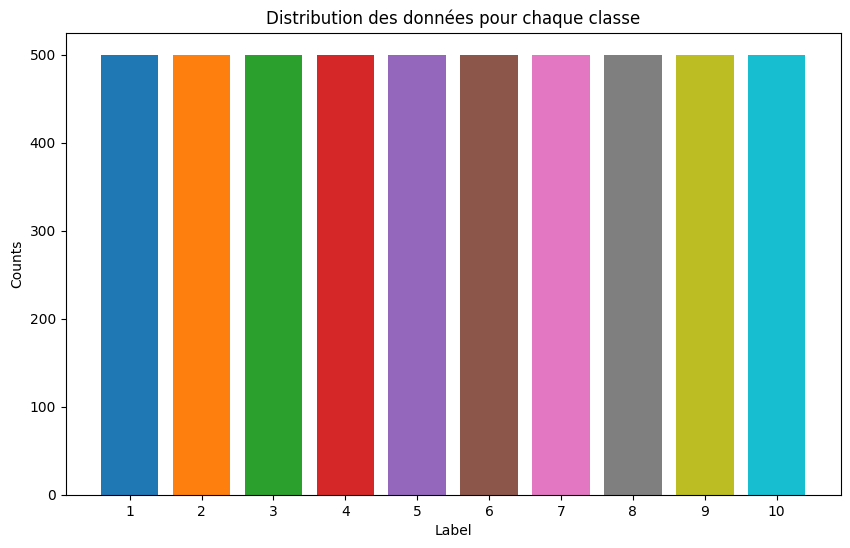

In [7]:
# Calcul des fréquences pour chaque classe et tri par ordre croissant des classes
labels_counts = df_labels[0].value_counts().sort_index()

# Génération d'une palette de 10 couleurs à partir de la colormap 'tab10'
colors = plt.cm.tab10(np.linspace(0, 1, len(labels_counts)))

# Création du graphique en barres avec des couleurs différentes pour chaque barre
plt.figure(figsize=(10, 6))
plt.bar(labels_counts.index, labels_counts.values, color=colors)
plt.xlabel('Label')
plt.ylabel("Counts")
plt.title('Distribution des données pour chaque classe')
plt.xticks(labels_counts.index)
plt.show()

0
10    500
1     500
2     500
3     500
4     500
5     500
6     500
7     500
8     500
9     500
Name: count, dtype: int64


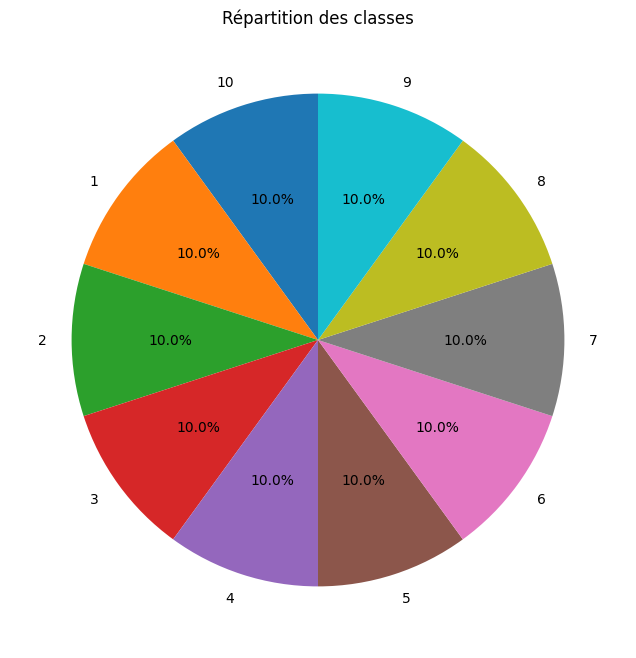

In [8]:

# Comptage des étiquettes uniques
labels_counts = df_labels[0].value_counts()
print(labels_counts)

# Création du diagramme circulaire
plt.figure(figsize=(8, 8))
plt.pie(labels_counts, labels=labels_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Répartition des classes")
plt.show()


Afficher aléatoirement quelques données de notre base

la ligne choisi pour image 1 : 1776
matrice 20*20 creer apartir de la ligne choisi pour image   1 : [[ 16  16  16  16  16  16  16  16  16  16  16  16  16  16  16  16  16  16
   16  16]
 [ 16  16  16  16  16  16  16  16  16  16  16  16  16  16  16  16  16  16
   16  16]
 [ 16  16  16  16  16  16  16  16  16  16  16  16  16  16  16  16  16  16
   16  16]
 [ 16  16  16  16  16  16  16  16  15  15  16  16  16  12  11  15  16  16
   16  16]
 [ 16  16  16  16  16  16  16  14  19  21  12  14  23  76  82  32  13  16
   16  16]
 [ 16  16  16  16  16  16  13  45 174 193  73  17  33 198 237 107  22  15
   16  16]
 [ 16  16  16  16  16  16  11 110 244 243 201  59  33 200 242 223  84   8
   16  16]
 [ 16  16  16  16  16  16  13 166 241 237 238 179  30 114 240 224  74   9
   16  16]
 [ 16  16  16  16  16  11  73 225 239 236 246 125   1  88 233 249 110   5
   16  16]
 [ 16  16  13  12  13   7 116 237 241 237 244 154  14  50 207 252 110   5
   16  16]
 [ 16  14 105 124  60  79 211 240 213 228 236 134 

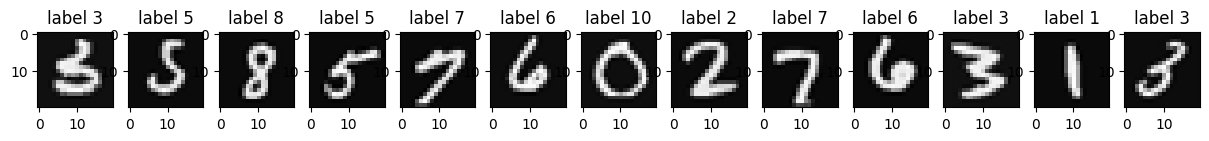

In [9]:
plt.figure(figsize=(15,8))#Crée une nouvelle figure (fenêtre) pour la visualisation, avec une taille de 15 pouces de large et 8 pouces de haut.
for i in range(13): #On souhaite afficher 13 images différentes dans la même figure. La boucle s’exécute donc 13 fois.
    c = random.randint(X.shape[0]) #pick a random line from the dataset 
    print("la ligne choisi pour image", i+1, ":", c)
    a = X[c,:].reshape((20, 20)) # Sélectionne la ligne c dans X (c’est-à-dire X[c,:]) et la remodèle en un tableau 2D de dimension 20×20.
    print("matrice 20*20 creer apartir de la ligne choisi pour image  ", i+1, ":",a)
    a=np.transpose(a) # la transposé (rendre les ligne des colonne et vice versa)
    #Transpose la matrice a, c’est-à-dire échange les lignes et les colonnes.
    print("matrice 20*20 apres Transpose ", i+1, ":",a)
#Selon la façon dont les données ont été enregistrées, cette étape peut être nécessaire pour restaurer 
#l’orientation correcte de l’image (éviter qu’elle soit “tournée” ou “inversée”).
    plt.subplot(1,13,i+1)#Crée un sous-graphique dans une figure découpée en 1 ligne et 13 colonnes.
    plt.title('label '+ str(Y[c]))#Y[c] est donc la classe correspondant à la ligne c dans le tableau des labels.
    plt.imshow(a,cmap='gray')

Notons que l'étiquette 10 concerne le chiffre 0. L'étiquette a été utilisée ainsi afin de faciliter les calculs conséquents.

# Implémentation des métriques demandées
Ici il faut écrire les fonctions, puis les appeler dans la suite du code

- Matrice de confusion :


notre implémentation  de la matrice de confusion. Cette implémentation permet de créer une matrice de confusion pour évaluer les performances d'un modèle de classification. Elle prend en compte les classes réelles et les classes prédites

1-Vérifie et extrait les classes uniques (si labels n'est pas donné).

2-Crée une matrice vide (num_labels x num_labels).

3-Associe chaque classe à un index dans la matrice.

4-Compte les correspondances (vrai, prédit) et remplit la matrice.

 📌Paramètres utilisés :

def custom_confusion_matrix(actual, predicted, labels=None):

1️⃣ actual → Liste  des classes réelles

2️⃣ predicted → Liste  des classes prédites

3️⃣ labels=None → Liste facultative des classes possibles

Si None, la fonction détecte automatiquement toutes les classes

📌 3. Explication des paramètres manquants

1️⃣ sample_weight (Poids des échantillons)

Par défaut, chaque exemple compte pour

 1. Mais si certains exemples doivent être plus importants, Scikit-Learn permet d'affecter un poids spécifique.

Exemple : Si on veut accorder plus d’importance aux erreurs sur la classe "1", on peut utiliser :

weights = [1, 2, 1, 1, 2]  # Double l'importance des classes "1".

conf_matrix = confusion_matrix(y_true, y_pred, sample_weight=weights)

 ce paramètre n’existe pas : tous les exemples sont comptés de la même manière.

2️⃣ normalize (Normalisation)

Par défaut, la matrice de confusion est affichée telle quelle. Mais si on veut la normaliser, on peut utiliser la valeur True.

#confusion_matrix(y_true, y_pred, normalize='true')  # Normalisation par ligne

#confusion_matrix(y_true, y_pred, normalize='pred')  # Normalisation par colonne

#confusion_matrix(y_true, y_pred, normalize='all')   # Normalisation globale


In [10]:
def confusion_matrix_imp(actual, predicted, labels=None): 
            
    # Vérifie si des libellés sont fournis en entrée
    if labels is None:
        # Si aucun libellé n'est fourni, extrait les libellés uniques à partir des étiquettes réelles et prédites
        labels = np.unique(np.concatenate((actual, predicted)))  #lables[1,2,3,.....,10]
        #Fusionne actual et predicted en un seul tableau.
        #Trouve toutes les classes uniques présentes dans les données.
    # Obtient le nombre total de libellés uniques
    num_labels = len(labels)  # Nombre total de classes
    

    matrix = np.zeros((num_labels, num_labels), dtype=int) #Crée une matrice de confusion[num_labels][num_labels ]carrée remplie de 0.
    
  
    label_to_index = {label: i for i, label in enumerate(labels)} #Convertit chaque classe en un index unique pour accéder à la matrice.

    # (index, label),{0: 0, 1: 1, 2: 2}

    # Parcourt chaque paire d'étiquettes réelles et prédites pour incrémenter les compteurs dans la matrice de confusion
    for a, p in zip(actual, predicted): # Parcourt les paires (réel, prédit)

       #actual = np.array([0, 1, 2, 1, 0, 2, 2, 1, 0])  # Classes réelles (vérités terrain)
       #predicted = np.array([0, 0, 2, 1, 0, 1, 2, 2, 0])  # Classes prédites par le modèle

       #
        actual_index = label_to_index[a]   # Trouve l'index de la vraie classe
        predicted_index = label_to_index[p] # Trouve l'index de la classe prédite
       
        # Incrémente le compteur correspondant dans la matrice de confusion
        matrix[actual_index][predicted_index] += 1
        # Exemple avec actual = [0, 1, 2] et predicted = [0, 0, 2] :

        #(0, 0) → matrix[0][0] += 1          
        #(1, 0) → matrix[1][0] += 1
        #(2, 2) → matrix[2][2] += 1

    # Retourne la matrice de confusion calculée
    return matrix 



In [11]:

def plot_confusion_matrix(conf_matrix, labels, title="Matrice de Confusion"):
    plt.figure(figsize=(9, 7))  # Ajuster la taille du graphique
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
                xticklabels=labels, yticklabels=labels, linewidths=1, linecolor='black')

    # Personnalisation des axes et du titre
    plt.xlabel("Valeurs Prédites", fontsize=12, fontweight='bold')
    plt.ylabel("Valeurs Réelles", fontsize=12, fontweight='bold')
    plt.title(title, fontsize=14, fontweight='bold')

    # Amélioration des étiquettes des axes
    plt.xticks(fontsize=10, rotation=0)
    plt.yticks(fontsize=10, rotation=0)

    plt.show()




- Accuracy = (TP + TN)/(TP + TN + FP + FN)
l'accuracy est un indicateur global qui prend en compte toutes les classes à la fois.
Il est calculé en divisant le nombre total de prédictions correctes par le nombre total de prédictions faites.

Voici la formule mathématique pour l'accuracy :

Accuracy = (TP + TN)/(TP + TN + FP + FN)

où :
- \( TP \) (True Positives) : le nombre de vraies positives (prédictions correctes)
- \( TN \) (True Negatives) : le nombre de vraies négatives (prédictions correctes)
- \( FP \) (False Positives) : le nombre de fausses positives (prédictions incorrectes)
- \( FN \) (False Negatives)

In [12]:
import numpy as np

def accuracy_score_imp(y_true, y_pred):
  
    y_true = np.array(y_true)  # Convertit en tableau NumPy si ce n'est pas déjà le cas
    y_pred = np.array(y_pred)

    return np.mean(y_true == y_pred)  # Moyenne des cas où y_true == y_pred
#exemple:

#y_true = [1, 0, 1, 1, 0, 1, 0, 0, 1, 1]  # Valeurs réelles
#y_pred = [1, 0, 1, 0, 0, 1, 1, 0, 1, 1]  # Prédictions du modèle
          #1  1  1  0  1  1   0  1  1 1
#accuracy =8 /10

- Recall:
le recall est une mesure de la capacité du modèle à identifier correctement les exemples positifs. Il est calculé comme le rapport entre le nombre de vrais positifs (TP) et la somme des vrais positifs et des faux négatifs (FN). 

Voici la formule mathématique pour recall :

 Recall (True Positive Rate) = TP/(TP + FN)


In [13]:

def recall_score_imp(actual, predicted):

    labels = np.unique(actual)  # Trouver toutes les classes uniques
    num_classes = len(labels)  # Nombre total de classes
    total_recall = 0
   # Boucle à travers chaque classe
    for label in labels:
        # incrémente le nombre de vrais positifs
        true_positives = np.sum((actual == label) & (predicted == label))
        # Sinon, incrémente le nombre de faux négatifs
        false_negatives = np.sum((actual == label) & (predicted != label))
        # Calcul du rappel pour la classe actuelle
        recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
        # Ajout du rappel de la classe actuelle au rappel total
        #ici on peut afficher recal de chque classe print("recall de laclasse:",lable,recall)

        # Affichage du recall par classe
        print(f"Recall de la classe {label}: {recall:.2f}")

        total_recall += recall

    return total_recall / num_classes  # Moyenne du recall sur toutes les classes
#exemple
# Exemple d'utilisation
#y_true = np.array([1, 0, 1, 2, 0, 1, 2, 2, 1, 0])  # Valeurs réelles
#y_pred = np.array([1, 0, 1, 0, 0, 1, 2, 2, 2, 0])  # Prédictions
#Classe FN (False Negatives) TP (True Positives)  	Recall 
# 0               0                3                3/(3+0) = 1.00
# 1               3                1               1/(3+1) = 0.75
# 2               2                1               1/(2+1) = 0.67
#Recall moyen = Recall moyen = 1.00+0.75+0.67/3=0.81=0.81 (≈ 81%)

In [14]:

def recall_score_classe(y_true, y_pred, labels):

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    recalls = []  # Stocke le   recall de chaque classe

   # Boucle à travers chaque classe
    for label in labels:
        # incrémente le nombre de vrais positifs
        true_positives = np.sum((y_true == label) & (y_pred == label))
        # Sinon, incrémente le nombre de faux négatifs
        false_negatives = np.sum((y_true == label) & (y_pred != label))
        # Calcul du rappel pour la classe actuelle

        recall_classe = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0

        # Ajout du rappel de la classe actuelle au rappel total
        #ici on peut afficher recal de chque classe print("recall de laclasse:",lable,recall)
        recalls.append(recall_classe)

    return recalls  # Moyenne du recall sur toutes les classes


- Précision: est une mesure de la qualité d'une classification. Elle est définie comme le nombre de vraies positives (TP) divisé par le nombre de vraies positives plus le nombre de fausses positives (FP). 
  
  Voici la formule mathématique pour Précision :  
                                                        Précision = TP/(TP + FP)                                   

In [15]:
import numpy as np

def precision_score_imp(y_true, y_pred, labels):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    precisions = []  # Stocke la précision de chaque classe

    for label in labels:
        # Calcul des vrais positifs (TP) et faux positifs (FP) pour chaque classe
        true_positives = np.sum((y_pred == label) & (y_true == label))
        false_positives = np.sum((y_pred == label) & (y_true != label))

        # Calcul de la précision pour la classe actuelle
        precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
         # Affichage du score de précision pour chaque classe
        print(f"Précision de la classe {label}: {precision:.2f}")
        precisions.append(precision)  # Ajout de la précision de la classe

    return np.mean(precisions)  # Moyenne des précisions par classe
# Exemple d'utilisation
#y_true = np.array([1, 0, 1, 2, 0, 1, 2, 2, 1, 0])  # Valeurs réelles
#y_pred = np.array([1, 0, 1, 0, 0, 1, 2, 2, 2, 0])  # Prédictions
#Classe FN ( false_positives) TP (True Positives)  	precision
# 0               1                3                3/(3+1) = 0.75
# 1               0                3               3/(3+0) = 1
# 2               1                2               2/(2+1) = 0.67
#precision moyen = precision moyen = 1.00+0.75+0.67/3==0.80 (≈ 80%)

- Le taux de faux positifs :(False Positive Rate, FPR) est une mesure couramment utilisée dans les modèles de classification, notamment dans les contextes de détection d'anomalies, de diagnostic médical, et de sécurité informatique. 

Il est défini comme suit :

- Taux de FP (False Positive Rate) = FP / (FP + TN)

In [16]:
def false_positive_rate_sklearn(y_true, y_pred):
        cm = confusion_matrix(y_true, y_pred)
        fp = np.sum(cm, axis=0) - np.diag(cm)
        tn = np.sum(cm) - (np.sum(cm, axis=0) - np.diag(cm) + np.sum(cm, axis=1) - np.diag(cm))
        fpr = fp / (fp + tn)
        return np.mean(fpr)

In [17]:
import numpy as np

def false_positive_rate_imp(y_true, y_pred, labels):    
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    false_positive_rates = []  # Stocke le FPR de chaque classe

    for label in labels:
        # Calcul des faux positifs (FP) et vrais négatifs (TN) pour chaque classe
        false_positives = np.sum((y_pred == label) & (y_true != label))
        true_negatives = np.sum((y_pred != label) & (y_true != label))

        # Évite la division par zéro
        fpr = false_positives / (false_positives + true_negatives) if (false_positives + true_negatives) > 0 else 0

        # Affichage du false_positive_rate pour chaque classe
        print(f"false positive rate de la classe {label}: {fpr:.2f}")

        false_positive_rates.append(fpr)  # Ajout du FPR de la classe

    return np.mean(false_positive_rates)  # Moyenne des FPR par classe
# Exemple d'utilisation
#y_true = np.array([1, 0, 1, 2, 0, 1, 2, 2, 1, 0])  # Valeurs réelles
#y_pred = np.array([1, 0, 1, 0, 0, 1, 2, 2, 2, 0])  # Prédictions
#Classe FN ( false_positives) TP (True Positives)  	false_positive_rate
# 0               1                3                1/(3+1) = 0.25
# 1               0                3               0/(3+0) = 0
# 2               1                2               1/(2+1) = 0.33
#precision moyen = precision moyen = 0.25+0+0.33/3==0.19 (≈ 19%)

In [18]:

def false_positive_rate_classe(y_true, y_pred, labels):    
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    false_positive_rates = []  # Stocke le FPR de chaque classe

    for label in labels:
        # Calcul des faux positifs (FP) et vrais négatifs (TN) pour chaque classe
        false_positives = np.sum((y_pred == label) & (y_true != label))
        true_negatives = np.sum((y_pred != label) & (y_true != label))

        # Évite la division par zéro
        fpr = false_positives / (false_positives + true_negatives) if (false_positives + true_negatives) > 0 else 0


        false_positive_rates.append(fpr)  # Ajout du FPR de la classe

    return false_positive_rates  # Moyenne des FPR par classe

- le spécificité :est une mesure de la capacité du modèle à prédire correctement les exemples négatifs. Elle est calculée comme le rapport entre le nombre de vrais négatifs (True Negatives, TN) et le nombre total de négatifs (TN + FP).

Voici la formule pour calculer la spécificité :

 Spécificité (True Negative Rate) = TN / (TN + FP)

In [19]:
def specificity_score_sklearn(y_true, y_pred):
        cm = confusion_matrix(y_true, y_pred)
        tn = np.sum(cm) - (np.sum(cm, axis=0) - np.diag(cm) + np.sum(cm, axis=1) - np.diag(cm))  # Total - (FP + FN + TP)
        fp = np.sum(cm, axis=0) - np.diag(cm)
        specificity = tn / (tn + fp)
        return np.mean(specificity)

In [20]:
import numpy as np

def specificity_score_imp(y_true, y_pred, labels):
   
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    specificities = []  # Stocke la spécificité de chaque classe

    for label in labels:
        # Calcul des vrais négatifs (TN) et des faux positifs (FP) pour chaque classe
        true_negatives = np.sum((y_true != label) & (y_pred != label))
        false_positives = np.sum((y_true != label) & (y_pred == label))

        # Évite la division par zéro
        specificity = true_negatives / (true_negatives + false_positives) if (true_negatives + false_positives) > 0 else 0

        
        # Affichage du specificity  pour chaque classe
        print(f"specificity  de la classe {label}: {specificity :.2f}")
        
        specificities.append(specificity)  # Ajout de la spécificité de la classe

    return np.mean(specificities)  # Moyenne des spécificités par classe
# Exemple d'utilisation
#y_true = np.array([1, 0, 1, 2, 0, 1, 2, 2, 1, 0])  # Valeurs réelles
#y_pred = np.array([1, 0, 1, 0, 0, 1, 2, 2, 2, 0])  # Prédictions
#Classe FN ( false_positives) TN (True Negatives)  	specificity
# 0               1                6                6/(6+1) = 0.86
# 1               0                6               6/(6+0) = 1
# 2               1                7               7/(7+1) = 0.875
#specificity  moyen = specificity  moyen = 0.25+0+0.33/3==0.91 (≈ 91%)

- Courbe ROC  (Receiver Operating Characteristic):

La courbe ROC est un graphique permettant d’évaluer les performances d’un modèle de classification binaire à différents seuils de décision.

In [21]:

 
# 1. Binarisation des étiquettes pour le problème multi-classes
#: Transforme un vecteur d’étiquettes multi-classes en une matrice binaire.
def label_binarize_custom(y, classes):
    
    #Transforme un vecteur d'étiquettes en une matrice binaire de shape (len(ytt), n_classes)
         
    y = np.array(y)
    binarized = np.zeros((len(y), len(classes)))
    for i, c in enumerate(classes):

        binarized[:, i] = (y == c).astype(int) #binarized[:, 0] =(y == 0) donne [ False, True, False, False] → [ 0, 1, 0, 0]
                                                #binarized[:, 1] =(y == 1) donne [ False, False, True, False] → [ 0, 0, 1, 0]
                                                #binarized[:, 2] =(y == 2) donne [ True, False, False, True] → [ 1, 0, 0, 1]
    return binarized
## Exemple de données
#y = [2, 0, 1, 2]  # Étiquettes d'origine
#classes = [0, 1, 2]  # Liste des classes uniques
#Étiquettes originales : [2, 0, 1, 2]

#Matrice binaire correspondante :
#[[0 0 1]  # y = 2 → [0 0 1]
# [1 0 0]  # y = 0 → [1 0 0]
 #[0 1 0]  # y = 1 → [0 1 0]
 #[0 0 1]  # y = 2 → [0 0 1]


# 2. Implémentation d'une fonction ROC 
#: Calcule les points de la courbe ROC (Receiver Operating Characteristic).
#y_true = np.array([0, 1, 1, 0, 1, 0, 1])  # Vraies classes
#y_score = np.array([0.1, 0.4, 0.35, 0.8, 0.9, 0.5, 0.75])  # Probabilités prédites

def roc_curve_custom(y_true, y_score):
    
    #y_true: vecteur binaire (0 ou 1) de la classe positif 
    #y_score: vecteur des probabilités prédites de shap matrice(len(ytt),nbcolonnes) pour la classe positive
    #Renvoie (fpr, tpr, thresholds)

    #On récupère toutes les valeurs uniques de y_score (les probabilités prédites) et on les trie.
    thresholds = np.sort(np.unique(y_score))

    #exemple Thresholds: [0.1  0.35 0.4  0.75 0.9 ]
    tpr_list = []
    fpr_list = []
    
    # Nombre total de positifs et de négatifs dans y_true
    P = np.sum(y_true == 1)
    N = np.sum(y_true == 0)
    
    for threshold in thresholds:
        # Prédiction binaire en fonction du seuil
        y_pred = (y_score >= threshold).astype(int)
        #y_score = np.array([0.1, 0.4, 0.35, 0.8, 0.9, 0.5, 0.75])  # Probabilités prédites
        #threshold = 0.5  # Seuil de décision
        #[0 0 0 1 1 1 1]
        TP = np.sum((y_true == 1) & (y_pred == 1))
        FP = np.sum((y_true == 0) & (y_pred == 1))
        
        tpr = TP / P if P > 0 else 0  # Sensibilité
        fpr = FP / N if N > 0 else 0  # 1 - Spécificité
        
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    
    return np.array(fpr_list), np.array(tpr_list), thresholds

# 3. Calcul de l'aire sous la courbe (AUC) par la méthode des trapèzes
def auc_custom(fpr, tpr):
    return np.trapz(tpr, fpr)
#AUC = 1.0 → Classifie parfaitement.
#AUC ≈ 0.5 → Performances équivalentes au hasard.
#AUC < 0.5 → Mauvais modèle.



# Classification

Définir d'abord la base d'entrainement Xt, Yt et la base de test Xtt, Ytt

 Pourquoi standardiser avant train_test_split() ?
Éviter les fuites de données (Data Leakage) :

Si on applique StandardScaler après avoir séparé les données, la moyenne et l'écart-type du dataset complet ne seront pas les mêmes que ceux de l'entraînement, ce qui fausserait les résultats.
Il faut donc calculer les statistiques sur l'ensemble du dataset (fit) puis appliquer la transformation (transform) avant la séparation.
Améliorer la convergence des algorithmes :


Certains modèles comme les SVMs, le k-NN, la régression logistique ou les réseaux de neurones sont sensibles aux échelles des variables.
Une normalisation permet une meilleure optimisation et un entraînement plus rapide.

🔹 En résumé

On initialise un StandardScaler pour normaliser les données.

fit(X) apprend la moyenne et l’écart-type des features.

transform(X) applique la normalisation.

train_test_split() divise les données normalisées en 70% train et 30% test.

👉 Objectif final : Préparer les données pour un entraînement efficace et éviter les biais liés aux différences d'échelles entre les variables. 

In [22]:
"""Données brutes X :
Avant normalisation, les valeurs sont entre 1 et 100 :
 [[52 93 15]
 [72 61 21]
 [83 87 75]
 [75 88 100]]

StandardScaler() est une classe de sklearn.preprocessing qui sert à normaliser les données.
Il transforme les features en ayant une moyenne = 0 et un écart-type = 1.
Cela est utile pour que les modèles ML ne soient pas influencés par des variables avec des échelles différentes."""
scaler = StandardScaler()

scaler.fit(X)
"""fit(X) permet de calculer la moyenne et l'écart-type de chaque colonne de X.
X représente les features (variables explicatives) du dataset."""


scaled_features = scaler.transform(X)


"""transform(X) applique la transformation pour centrer et réduire les valeurs de X.

Cela revient à appliquer la formule suivante sur chaque valeur 
x scaled = x-μ/alpha
μ = Moyenne de la colonne
alpha = Écart-type de la colonne
Après cette étape, scaled_features contient les valeurs de X normalisées.



Données normalisées :
 [[ 0.15058913  0.96999488 -1.01447158]
 [ 0.93618248  0.12519714 -0.79825416]
 [ 1.40035129  0.66062506  0.7126549 ]
 [ 1.05823234  0.69428223  1.45163158]]"""


Xt, Xtt, Yt, Ytt = train_test_split(
      scaled_features, Y, test_size = 0.30)


"""Données d'entraînement (Xt) :
 [[-1.62353198 -1.13109869  1.02232582]
 [ 1.05823234  0.69428223  1.45163158]
 [ 1.40035129  0.66062506  0.7126549 ]]

Données de test (Xtt) :
 [ 0.69208276 -1.09153669  0.25506139]
"""

"Données d'entraînement (Xt) :\n [[-1.62353198 -1.13109869  1.02232582]\n [ 1.05823234  0.69428223  1.45163158]\n [ 1.40035129  0.66062506  0.7126549 ]]\n\nDonnées de test (Xtt) :\n [ 0.69208276 -1.09153669  0.25506139]\n"

# Méthode 0: K- Plus Proches Voisins 

Ici il faudra implémenter la méthode, puis la tester et vérifier les métriques en variant le nombre K

------------------------------------------------Afficher les résultats implémenté-----------------------------------------------------
K = 1:


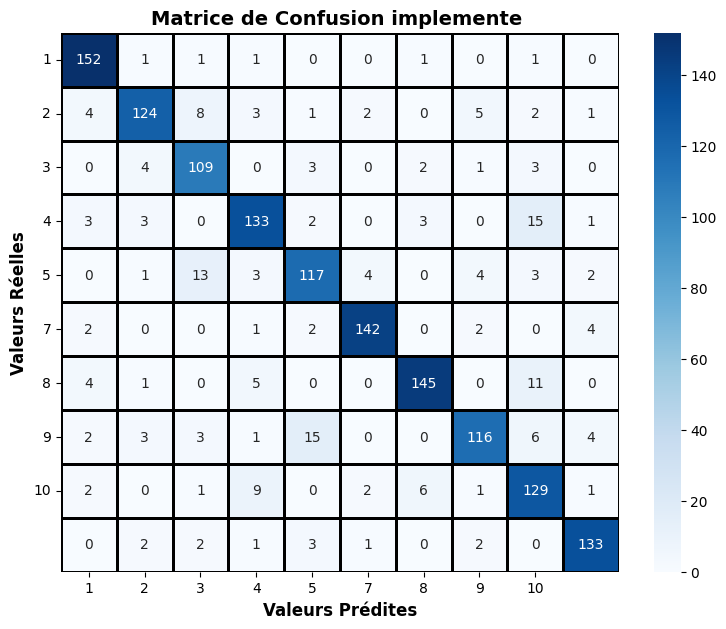

Recall de la classe 1: 0.97
Recall de la classe 2: 0.83
Recall de la classe 3: 0.89
Recall de la classe 4: 0.83
Recall de la classe 5: 0.80
Recall de la classe 6: 0.93
Recall de la classe 7: 0.87
Recall de la classe 8: 0.77
Recall de la classe 9: 0.85
Recall de la classe 10: 0.92
Précision de la classe 1: 0.90
Précision de la classe 2: 0.89
Précision de la classe 3: 0.80
Précision de la classe 4: 0.85
Précision de la classe 5: 0.82
Précision de la classe 7: 0.92
Précision de la classe 8: 0.89
Précision de la classe 9: 0.76
Précision de la classe 10: 0.91
false positive rate de la classe 1: 0.01
false positive rate de la classe 2: 0.01
false positive rate de la classe 3: 0.02
false positive rate de la classe 4: 0.02
false positive rate de la classe 5: 0.02
false positive rate de la classe 7: 0.01
false positive rate de la classe 8: 0.01
false positive rate de la classe 9: 0.03
false positive rate de la classe 10: 0.01
specificity  de la classe 1: 0.99
specificity  de la classe 2: 0.99
s

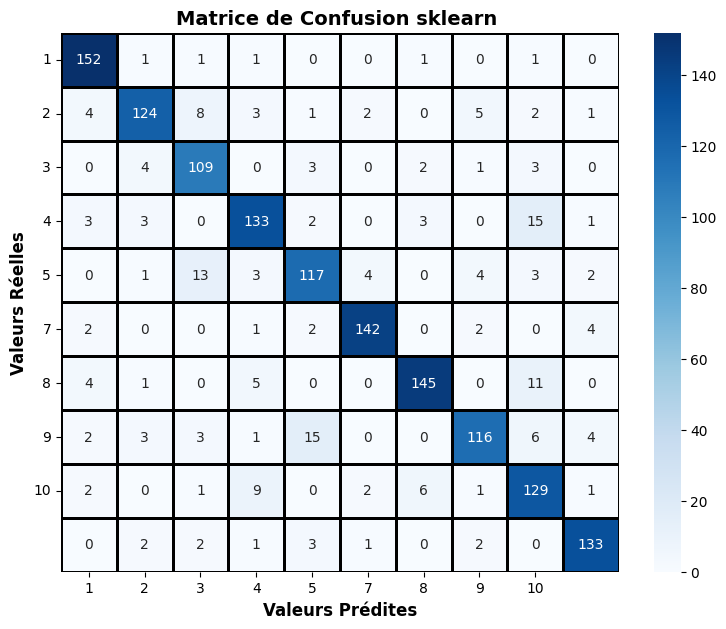

[[152   1   1   1   0   0   1   0   1   0]
 [  4 124   8   3   1   2   0   5   2   1]
 [  0   4 109   0   3   0   2   1   3   0]
 [  3   3   0 133   2   0   3   0  15   1]
 [  0   1  13   3 117   4   0   4   3   2]
 [  2   0   0   1   2 142   0   2   0   4]
 [  4   1   0   5   0   0 145   0  11   0]
 [  2   3   3   1  15   0   0 116   6   4]
 [  2   0   1   9   0   2   6   1 129   1]
 [  0   2   2   1   3   1   0   2   0 133]]
Accuracy sklearn: 0.8666666666666667
Recall  sklearn: 0.8668278154479511
Precision  sklearn: 0.8671673475760457
False Positive Rate  sklearn: 0.01352185609603109
Specificity  sklearn: 0.9864781439039689
------------------------------------------------roc_curve sklearn pour chaque classe----------------------------------------------------


C:\Users\HERO-INFO\AppData\Local\Temp\ipykernel_11492\3621513453.py:90: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', n_classes)


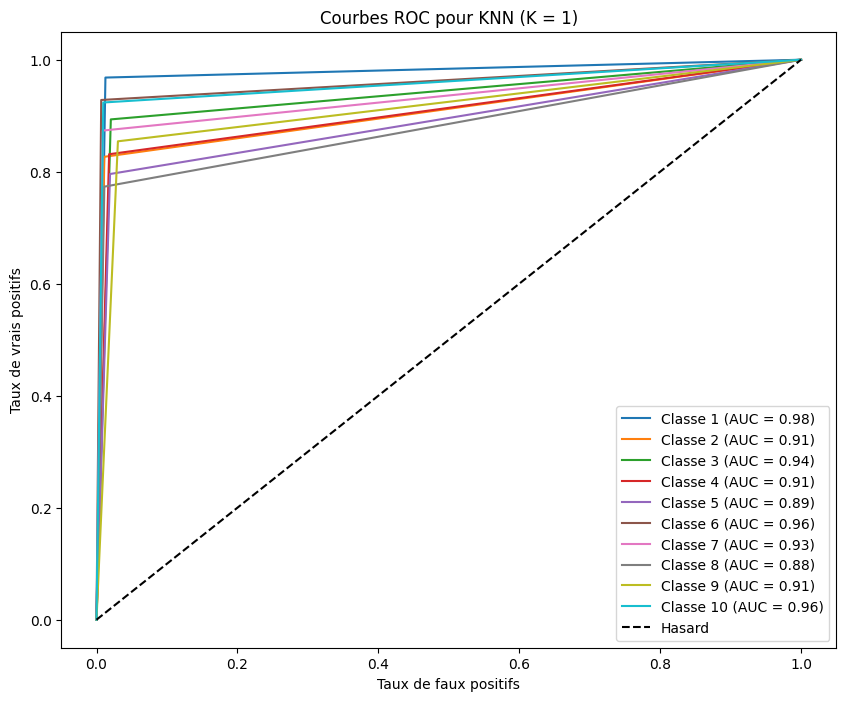

------------------------------------------------roc_curve implemente pour chaque classe----------------------------------------------------


C:\Users\HERO-INFO\AppData\Local\Temp\ipykernel_11492\1799653210.py:68: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.trapz(tpr, fpr)
C:\Users\HERO-INFO\AppData\Local\Temp\ipykernel_11492\3621513453.py:133: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', n_classes)


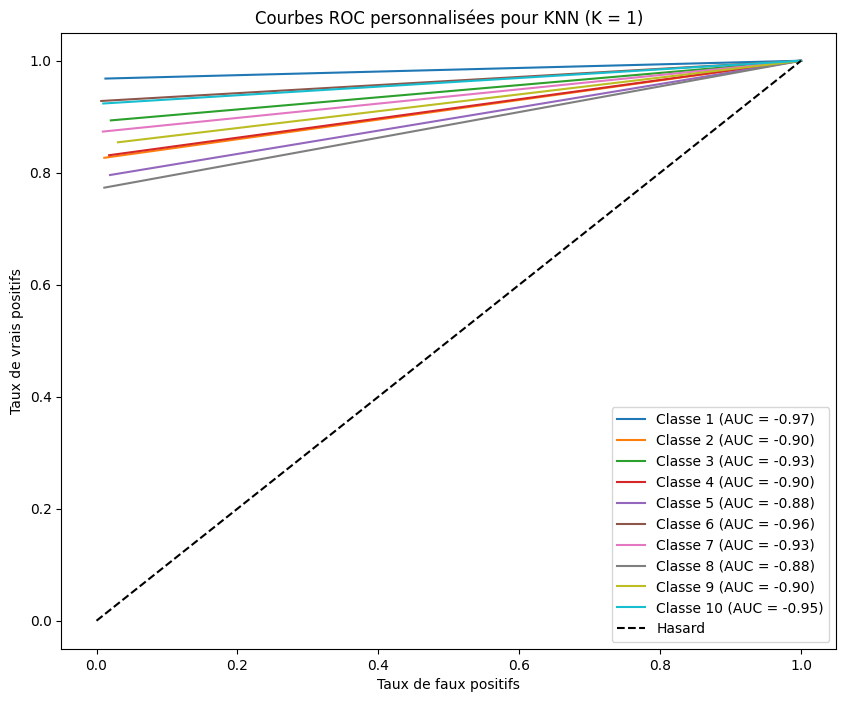

------------------------------------------------Afficher les résultats implémenté-----------------------------------------------------
K = 3:


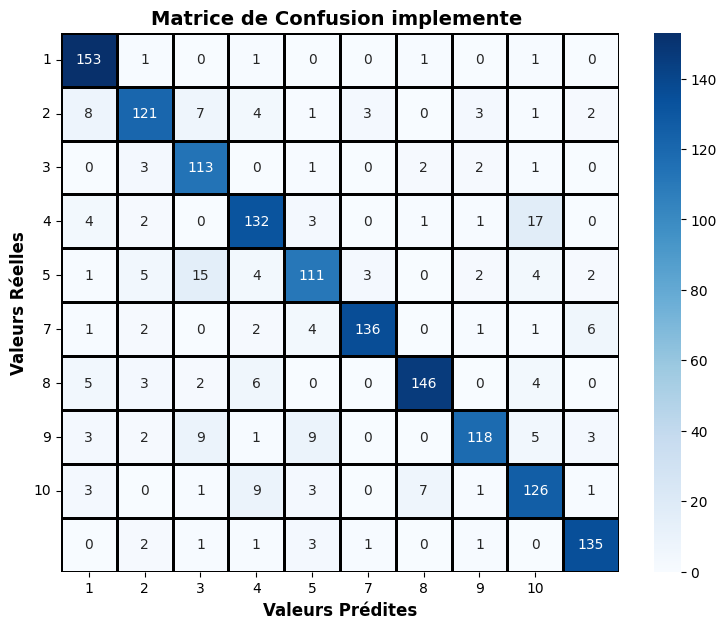

Recall de la classe 1: 0.97
Recall de la classe 2: 0.81
Recall de la classe 3: 0.93
Recall de la classe 4: 0.82
Recall de la classe 5: 0.76
Recall de la classe 6: 0.89
Recall de la classe 7: 0.88
Recall de la classe 8: 0.79
Recall de la classe 9: 0.83
Recall de la classe 10: 0.94
Précision de la classe 1: 0.86
Précision de la classe 2: 0.86
Précision de la classe 3: 0.76
Précision de la classe 4: 0.82
Précision de la classe 5: 0.82
Précision de la classe 7: 0.93
Précision de la classe 8: 0.91
Précision de la classe 9: 0.79
Précision de la classe 10: 0.91
false positive rate de la classe 1: 0.02
false positive rate de la classe 2: 0.01
false positive rate de la classe 3: 0.03
false positive rate de la classe 4: 0.02
false positive rate de la classe 5: 0.02
false positive rate de la classe 7: 0.01
false positive rate de la classe 8: 0.01
false positive rate de la classe 9: 0.03
false positive rate de la classe 10: 0.01
specificity  de la classe 1: 0.98
specificity  de la classe 2: 0.99
s

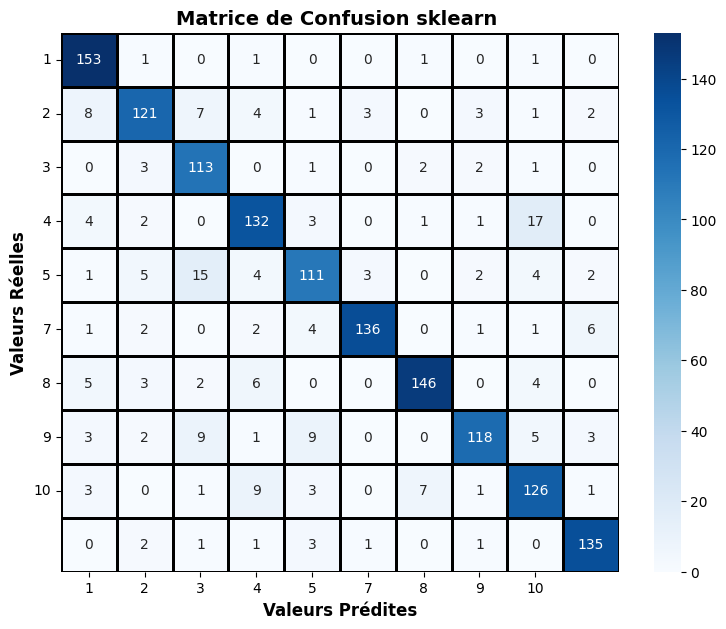

[[153   1   0   1   0   0   1   0   1   0]
 [  8 121   7   4   1   3   0   3   1   2]
 [  0   3 113   0   1   0   2   2   1   0]
 [  4   2   0 132   3   0   1   1  17   0]
 [  1   5  15   4 111   3   0   2   4   2]
 [  1   2   0   2   4 136   0   1   1   6]
 [  5   3   2   6   0   0 146   0   4   0]
 [  3   2   9   1   9   0   0 118   5   3]
 [  3   0   1   9   3   0   7   1 126   1]
 [  0   2   1   1   3   1   0   1   0 135]]
Accuracy sklearn: 0.8606666666666667
Recall  sklearn: 0.8614531222610772
Precision  sklearn: 0.8617696533310637
False Positive Rate  sklearn: 0.01412830842661882
Specificity  sklearn: 0.9858716915733812
------------------------------------------------roc_curve sklearn pour chaque classe----------------------------------------------------


C:\Users\HERO-INFO\AppData\Local\Temp\ipykernel_11492\3621513453.py:90: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', n_classes)


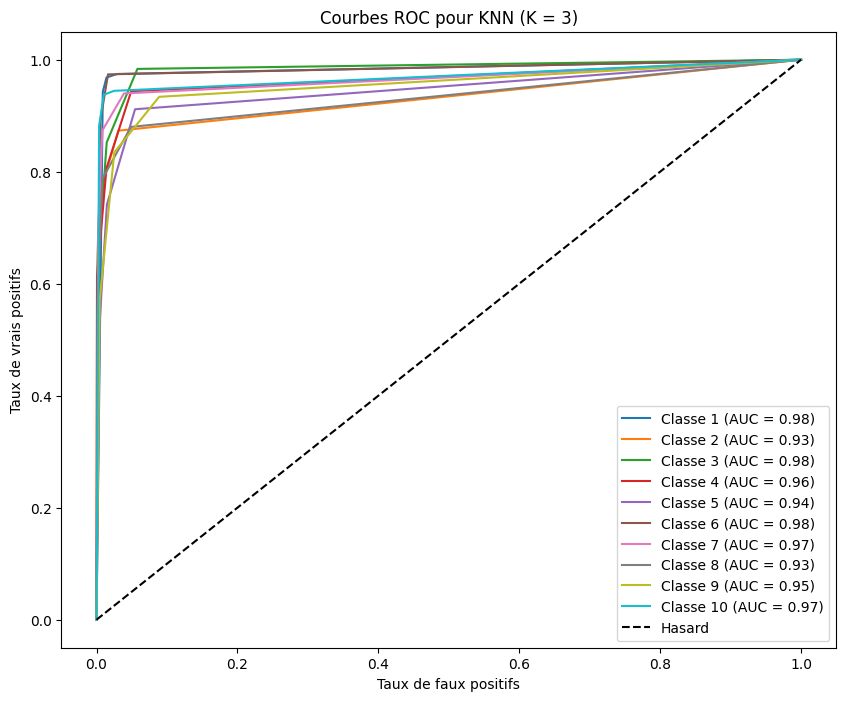

------------------------------------------------roc_curve implemente pour chaque classe----------------------------------------------------


C:\Users\HERO-INFO\AppData\Local\Temp\ipykernel_11492\1799653210.py:68: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.trapz(tpr, fpr)
C:\Users\HERO-INFO\AppData\Local\Temp\ipykernel_11492\3621513453.py:133: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', n_classes)


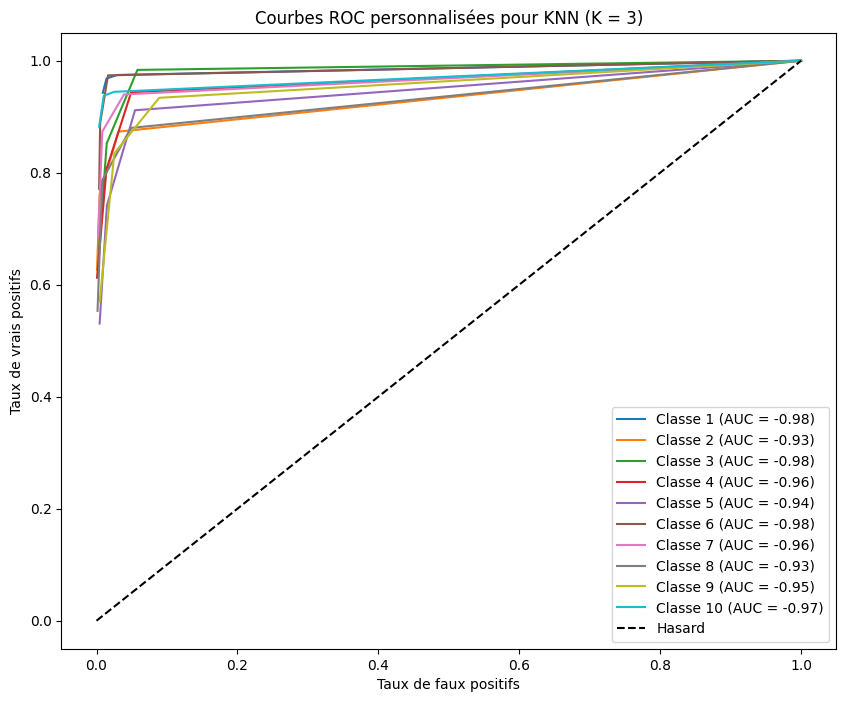

------------------------------------------------Afficher les résultats implémenté-----------------------------------------------------
K = 5:


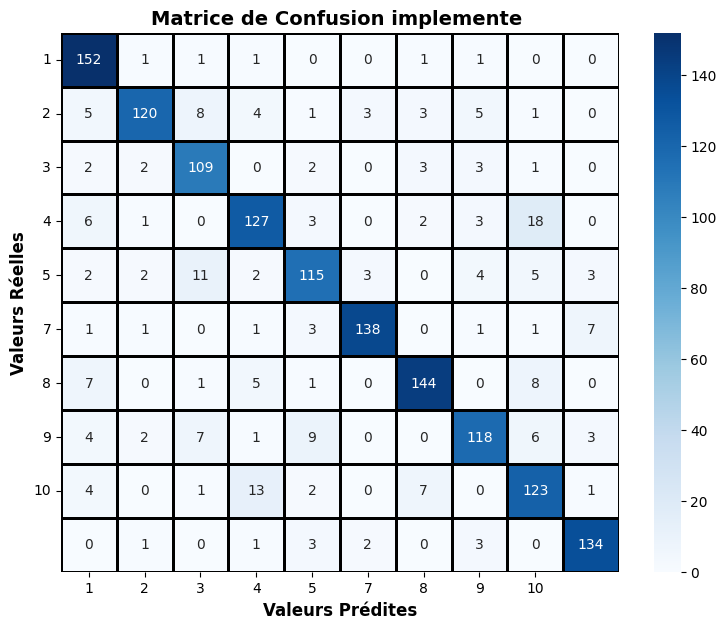

Recall de la classe 1: 0.97
Recall de la classe 2: 0.80
Recall de la classe 3: 0.89
Recall de la classe 4: 0.79
Recall de la classe 5: 0.78
Recall de la classe 6: 0.90
Recall de la classe 7: 0.87
Recall de la classe 8: 0.79
Recall de la classe 9: 0.81
Recall de la classe 10: 0.93
Précision de la classe 1: 0.83
Précision de la classe 2: 0.92
Précision de la classe 3: 0.79
Précision de la classe 4: 0.82
Précision de la classe 5: 0.83
Précision de la classe 7: 0.90
Précision de la classe 8: 0.86
Précision de la classe 9: 0.75
Précision de la classe 10: 0.91
false positive rate de la classe 1: 0.02
false positive rate de la classe 2: 0.01
false positive rate de la classe 3: 0.02
false positive rate de la classe 4: 0.02
false positive rate de la classe 5: 0.02
false positive rate de la classe 7: 0.01
false positive rate de la classe 8: 0.01
false positive rate de la classe 9: 0.03
false positive rate de la classe 10: 0.01
specificity  de la classe 1: 0.98
specificity  de la classe 2: 0.99
s

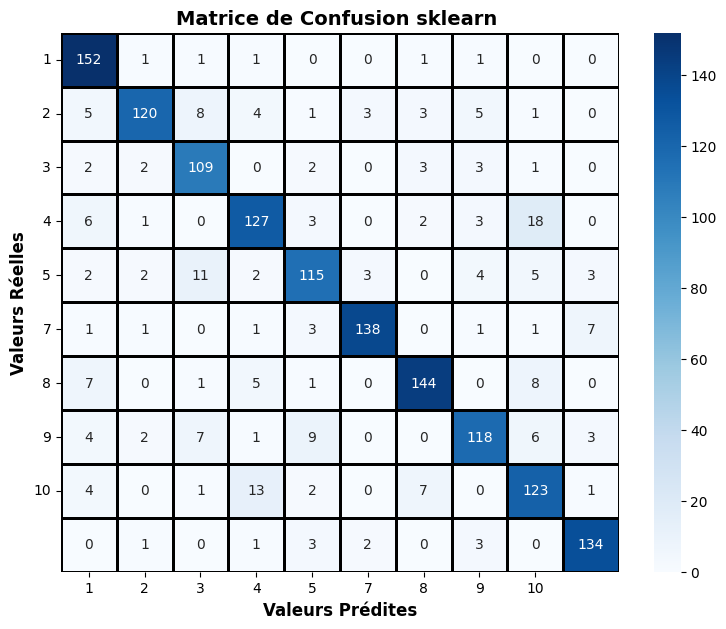

[[152   1   1   1   0   0   1   1   0   0]
 [  5 120   8   4   1   3   3   5   1   0]
 [  2   2 109   0   2   0   3   3   1   0]
 [  6   1   0 127   3   0   2   3  18   0]
 [  2   2  11   2 115   3   0   4   5   3]
 [  1   1   0   1   3 138   0   1   1   7]
 [  7   0   1   5   1   0 144   0   8   0]
 [  4   2   7   1   9   0   0 118   6   3]
 [  4   0   1  13   2   0   7   0 123   1]
 [  0   1   0   1   3   2   0   3   0 134]]
Accuracy sklearn: 0.8533333333333334
Recall  sklearn: 0.8538880836840788
Precision  sklearn: 0.8550510632262387
False Positive Rate  sklearn: 0.014888271541990414
Specificity  sklearn: 0.9851117284580097
------------------------------------------------roc_curve sklearn pour chaque classe----------------------------------------------------


C:\Users\HERO-INFO\AppData\Local\Temp\ipykernel_11492\3621513453.py:90: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', n_classes)


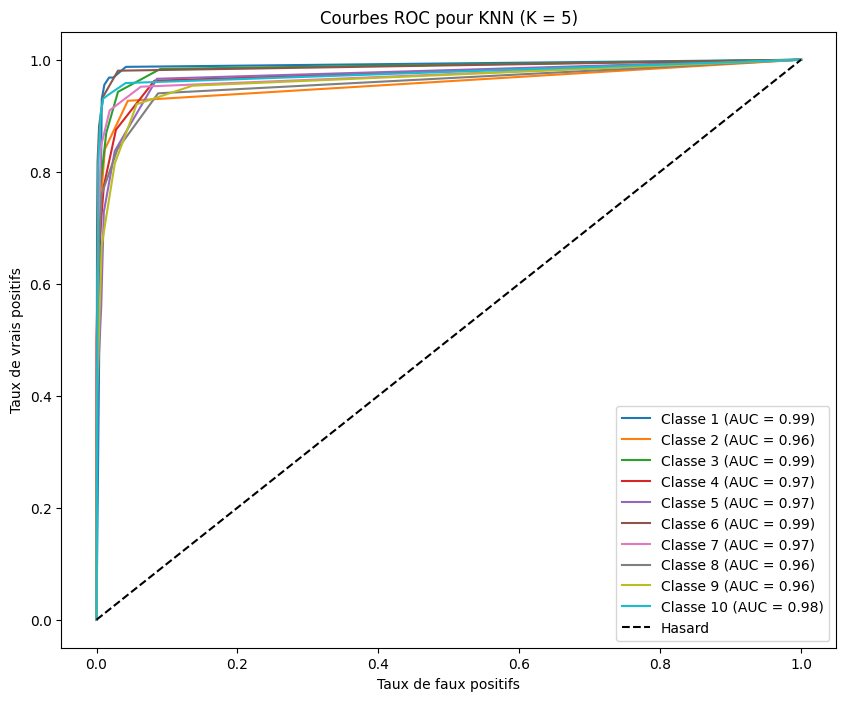

------------------------------------------------roc_curve implemente pour chaque classe----------------------------------------------------


C:\Users\HERO-INFO\AppData\Local\Temp\ipykernel_11492\1799653210.py:68: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.trapz(tpr, fpr)
C:\Users\HERO-INFO\AppData\Local\Temp\ipykernel_11492\3621513453.py:133: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', n_classes)


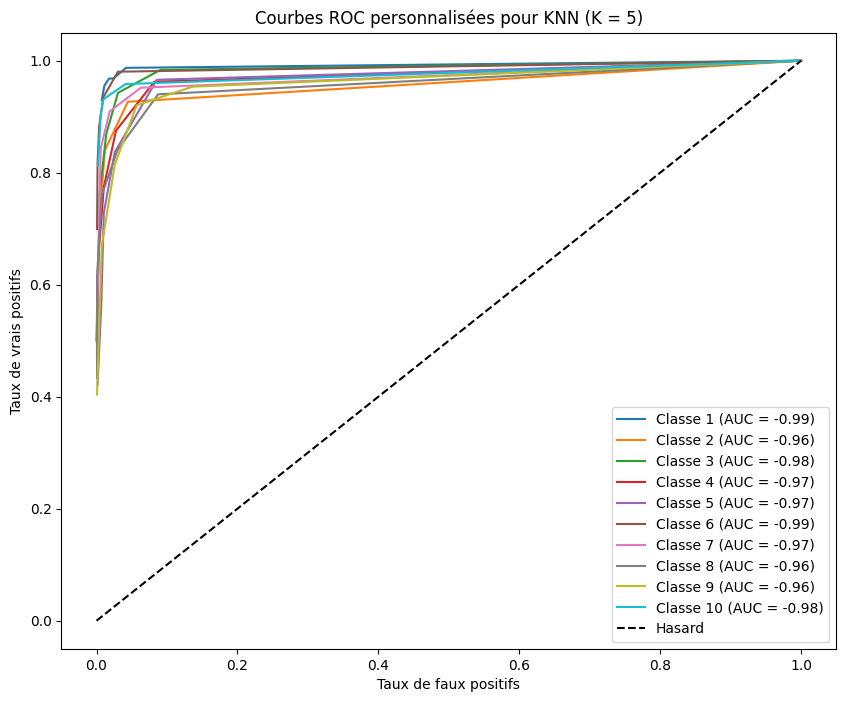

------------------------------------------------Afficher les résultats implémenté-----------------------------------------------------
K = 7:


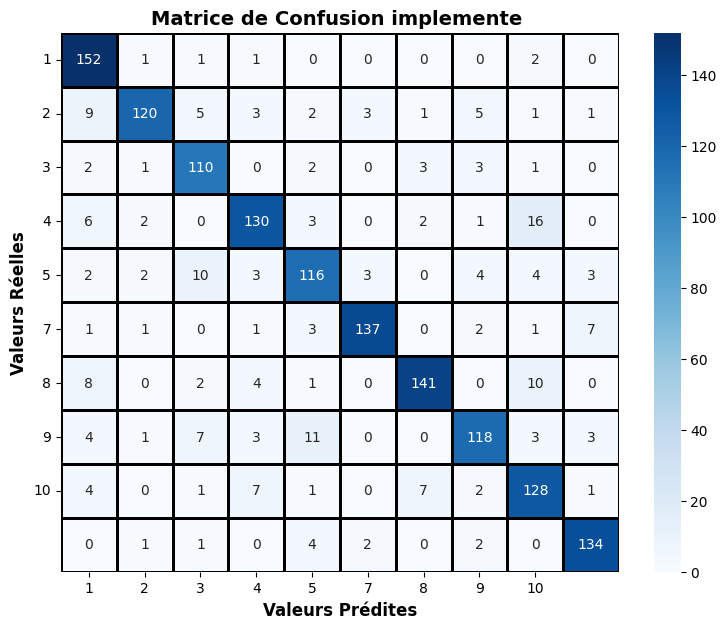

Recall de la classe 1: 0.97
Recall de la classe 2: 0.80
Recall de la classe 3: 0.90
Recall de la classe 4: 0.81
Recall de la classe 5: 0.79
Recall de la classe 6: 0.90
Recall de la classe 7: 0.85
Recall de la classe 8: 0.79
Recall de la classe 9: 0.85
Recall de la classe 10: 0.93
Précision de la classe 1: 0.81
Précision de la classe 2: 0.93
Précision de la classe 3: 0.80
Précision de la classe 4: 0.86
Précision de la classe 5: 0.81
Précision de la classe 7: 0.92
Précision de la classe 8: 0.86
Précision de la classe 9: 0.77
Précision de la classe 10: 0.90
false positive rate de la classe 1: 0.03
false positive rate de la classe 2: 0.01
false positive rate de la classe 3: 0.02
false positive rate de la classe 4: 0.02
false positive rate de la classe 5: 0.02
false positive rate de la classe 7: 0.01
false positive rate de la classe 8: 0.01
false positive rate de la classe 9: 0.03
false positive rate de la classe 10: 0.01
specificity  de la classe 1: 0.97
specificity  de la classe 2: 0.99
s

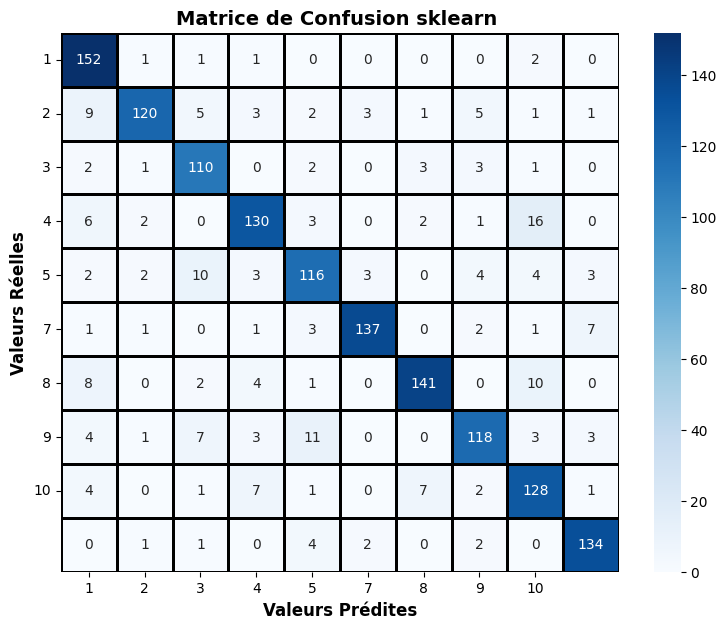

[[152   1   1   1   0   0   0   0   2   0]
 [  9 120   5   3   2   3   1   5   1   1]
 [  2   1 110   0   2   0   3   3   1   0]
 [  6   2   0 130   3   0   2   1  16   0]
 [  2   2  10   3 116   3   0   4   4   3]
 [  1   1   0   1   3 137   0   2   1   7]
 [  8   0   2   4   1   0 141   0  10   0]
 [  4   1   7   3  11   0   0 118   3   3]
 [  4   0   1   7   1   0   7   2 128   1]
 [  0   1   1   0   4   2   0   2   0 134]]
Accuracy sklearn: 0.8573333333333333
Recall  sklearn: 0.8581134625153111
Precision  sklearn: 0.8600253940364404
False Positive Rate  sklearn: 0.014463582942401354
Specificity  sklearn: 0.9855364170575985
------------------------------------------------roc_curve sklearn pour chaque classe----------------------------------------------------


C:\Users\HERO-INFO\AppData\Local\Temp\ipykernel_11492\3621513453.py:90: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', n_classes)


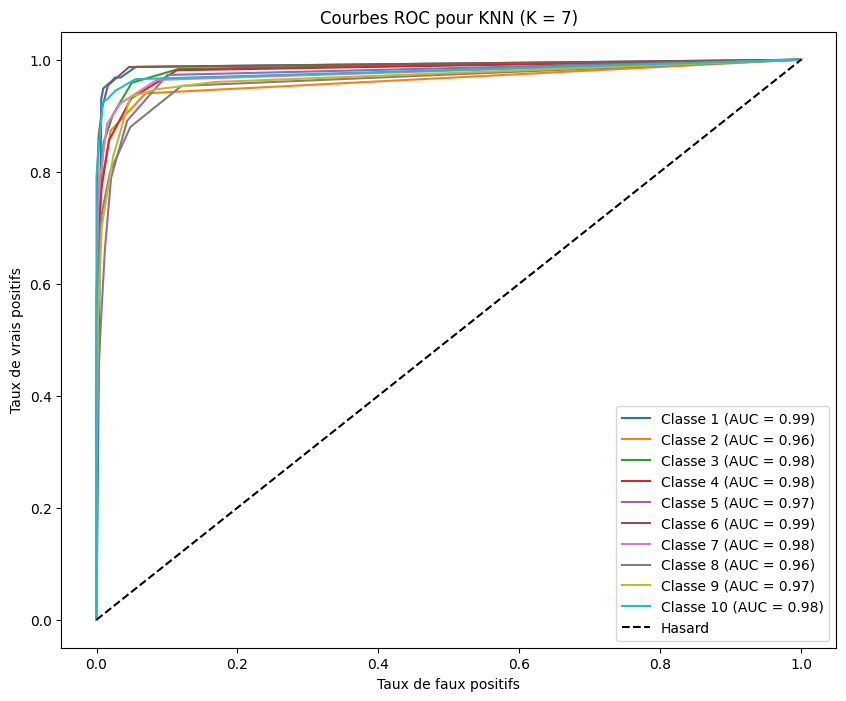

------------------------------------------------roc_curve implemente pour chaque classe----------------------------------------------------


C:\Users\HERO-INFO\AppData\Local\Temp\ipykernel_11492\1799653210.py:68: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.trapz(tpr, fpr)
C:\Users\HERO-INFO\AppData\Local\Temp\ipykernel_11492\3621513453.py:133: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', n_classes)


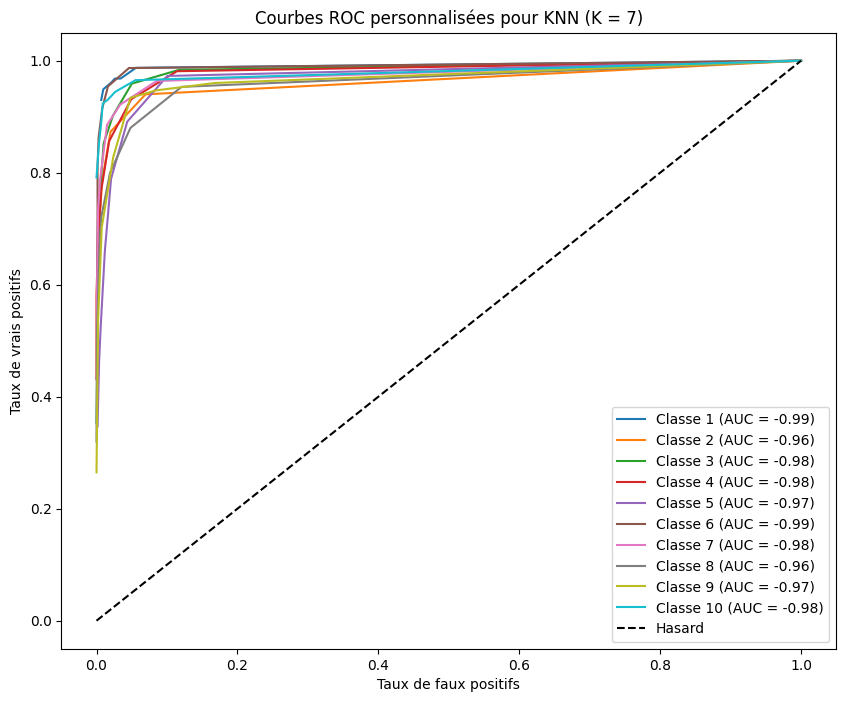

In [23]:

# Méthode 0: K- Plus Proches Voisins
# Tester différentes valeurs de K et évaluer les performances du modèle
K_values = [1,3,5,7]  # Valeurs de K à tester 
for k in K_values:
    # Prédire les étiquettes pour les données de test
#     y_pred = k_nearest_neighbors(Xt, Yt, Xtt, k)
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(Xt, Yt)
    y_pred = knn_model.predict(Xtt)
    # Calculer les métriques de performance
#     conf_matrix = confusion_matrix(Ytt, y_pred, num_classes=10)
     # Afficher les résultats
    print("------------------------------------------------Afficher les résultats implémenté-----------------------------------------------------")
    print(f"K = {k}:")
    conf_matrix_imp = confusion_matrix_imp(Ytt, y_pred)

    labels = [1, 2,3,4,5,7,8,9,10]
    plot_confusion_matrix(conf_matrix_imp, labels, title="Matrice de Confusion implemente ")


    acc = accuracy_score_imp(Ytt, y_pred)
   
    recall = recall_score_imp(Ytt, y_pred)
 
    
    precision = precision_score_imp(Ytt, y_pred,labels)  # Étiquette positive pour le chiffre 0

    
    fpr = false_positive_rate_imp(Ytt, y_pred, labels)  # Étiquette positive pour le chiffre 0
    specificity = specificity_score_imp(Ytt, y_pred, labels)  # Étiquette négative pour le chiffre 0
#     roc_fpr, roc_tpr = roc_curve(Ytt, y_pred, positive_label=10)  # Étiquette positive pour le chiffre 0
    
   
    
    print(conf_matrix_imp)
    print(f"Accuracy: {acc}")
    print(f"Recall: {recall}")
    print(f"Precision: {precision}")
    print(f"False Positive Rate: {fpr}")
    print(f"Specificity: {specificity}")

   
    print("------------------------------------------------Afficher les résultats sklearn-----------------------------------------------------")
    print(f"K = {k}:")
    conf_matrix = confusion_matrix(Ytt, y_pred)
    plot_confusion_matrix(conf_matrix_imp, labels, title="Matrice de Confusion sklearn ")
    
    accuracy_sklearn = accuracy_score(Ytt, y_pred)
    precision_sklearn = precision_score(Ytt, y_pred,average="macro")  # Étiquette positive pour le chiffre 0
    recall_sklearn = recall_score(Ytt, y_pred,average="macro")

    fpr_sklearn  = false_positive_rate_sklearn(Ytt, y_pred)  # Étiquette positive pour le chiffre 0

    specificity_sklearn  = specificity_score_sklearn(Ytt, y_pred)  # Étiquette négative pour le chiffre 0"""
    print(conf_matrix)

    print(f"Accuracy sklearn: { accuracy_sklearn}")
    print(f"Recall  sklearn: {recall_sklearn}")
    print(f"Precision  sklearn: {precision_sklearn}")
    print(f"False Positive Rate  sklearn: {fpr_sklearn}")
    print(f"Specificity  sklearn: {specificity_sklearn}")
   
    print("------------------------------------------------roc_curve sklearn pour chaque classe----------------------------------------------------")
   # Prédiction des probabilités pour toutes les classes (shape: [n_samples, 10])
    y_score = knn_model.predict_proba(Xtt)
  
    # Binarisation des étiquettes (Ytt doit contenir 10 classes distinctes)
    classes = np.unique(Ytt)

    y_test_bin = label_binarize(Ytt, classes=classes)
    
    n_classes = y_test_bin.shape[1]

    # Initialisation des dictionnaires pour stocker FPR, TPR et AUC pour chaque classe
    fpr = {}
    tpr = {}
    roc_auc = {}

    # Calcul de la courbe ROC pour chaque classe
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

     # Optionnel : Calcul de la ROC micro-moyennée (sur l'ensemble des classes)
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Affichage des courbes ROC pour chaque classe
    plt.figure(figsize=(10, 8))
    colors = plt.cm.get_cmap('tab10', n_classes)
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], color=colors(i),
             label=f'Classe {classes[i]} (AUC = {roc_auc[i]:.2f})')

    # Courbe de référence (diagonale)
    plt.plot([0, 1], [0, 1], 'k--', label='Hasard')

    plt.xlabel('Taux de faux positifs')
    plt.ylabel('Taux de vrais positifs')
    plt.title(f"Courbes ROC pour KNN (K = {k})")
    plt.legend(loc="lower right")
    plt.show()
    
    print("------------------------------------------------roc_curve implemente pour chaque classe----------------------------------------------------")
   # Supposons que knn_model, Xtt et Ytt soient déjà définis.
    # y_score sera de forme (n_samples, n_classes)
    #n_samples :nombre de lignes de ytt
    #n_classes : nombre de colonnnes :nombre de classes 
    
    y_score = knn_model.predict_proba(Xtt) #matrice(len(ytt),n_classes)
   
    # Récupération des classes présentes dans Ytt
    classes = np.unique(Ytt)
    n_classes = len(classes)

    # Binarisation des étiquettes
    y_test_bin = label_binarize_custom(Ytt, classes) ##Transforme un vecteur d'étiquettes en une matrice binaire de matrice(len(ytt),n_classes)

   
    # 4. Calcul et affichage des courbes ROC pour chaque classe
    fpr_dict = {}
    tpr_dict = {}
    roc_auc_dict = {}

    for i in range(n_classes):
        fpr, tpr, thresholds = roc_curve_custom(y_test_bin[:, i], y_score[:, i])
        fpr_dict[i] = fpr
        tpr_dict[i] = tpr
        roc_auc_dict[i] = auc_custom(fpr, tpr)

    # Affichage avec Matplotlib
    plt.figure(figsize=(10, 8))
    colors = plt.cm.get_cmap('tab10', n_classes)
    for i in range(n_classes):
        plt.plot(fpr_dict[i], tpr_dict[i], color=colors(i),
             label=f'Classe {classes[i]} (AUC = {roc_auc_dict[i]:.2f})')

    # Courbe de référence (diagonale)
    plt.plot([0, 1], [0, 1], 'k--', label='Hasard')
    plt.xlabel('Taux de faux positifs')
    plt.ylabel('Taux de vrais positifs')
    plt.title(f"Courbes ROC personnalisées pour KNN (K = {k})")
    plt.legend(loc="lower right")
    plt.show()
#     print("\n")

L'algorithme KNN (K-Nearest Neighbors) est un algorithme de classification supervisé basé sur la proximité des données. Il fonctionne selon les étapes suivantes :

📌 1. Fonctionnement de l'algorithme KNN

1️⃣ Calculer la distance entre un point de test et tous les points d'entraînement.

2️⃣ Trouver les K plus proches voisins (les points avec la plus petite distance).

3️⃣ Effectuer un vote majoritaire parmi ces voisins pour déterminer la classe du point de test.

4️⃣ Attribuer l'étiquette la plus fréquente à la nouvelle donnée.



------------------------------------------------Afficher les résultats implémenté-----------------------------------------------------
K = 1:


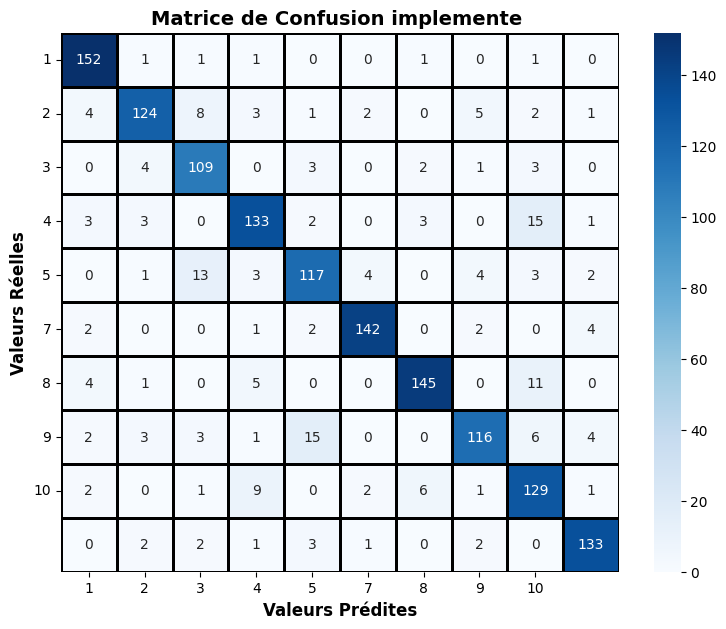

Recall de la classe 1: 0.97
Recall de la classe 2: 0.83
Recall de la classe 3: 0.89
Recall de la classe 4: 0.83
Recall de la classe 5: 0.80
Recall de la classe 6: 0.93
Recall de la classe 7: 0.87
Recall de la classe 8: 0.77
Recall de la classe 9: 0.85
Recall de la classe 10: 0.92
Précision de la classe 1: 0.90
Précision de la classe 2: 0.89
Précision de la classe 3: 0.80
Précision de la classe 4: 0.85
Précision de la classe 5: 0.82
Précision de la classe 7: 0.92
Précision de la classe 8: 0.89
Précision de la classe 9: 0.76
Précision de la classe 10: 0.91
false positive rate de la classe 1: 0.01
false positive rate de la classe 2: 0.01
false positive rate de la classe 3: 0.02
false positive rate de la classe 4: 0.02
false positive rate de la classe 5: 0.02
false positive rate de la classe 7: 0.01
false positive rate de la classe 8: 0.01
false positive rate de la classe 9: 0.03
false positive rate de la classe 10: 0.01
specificity  de la classe 1: 0.99
specificity  de la classe 2: 0.99
s

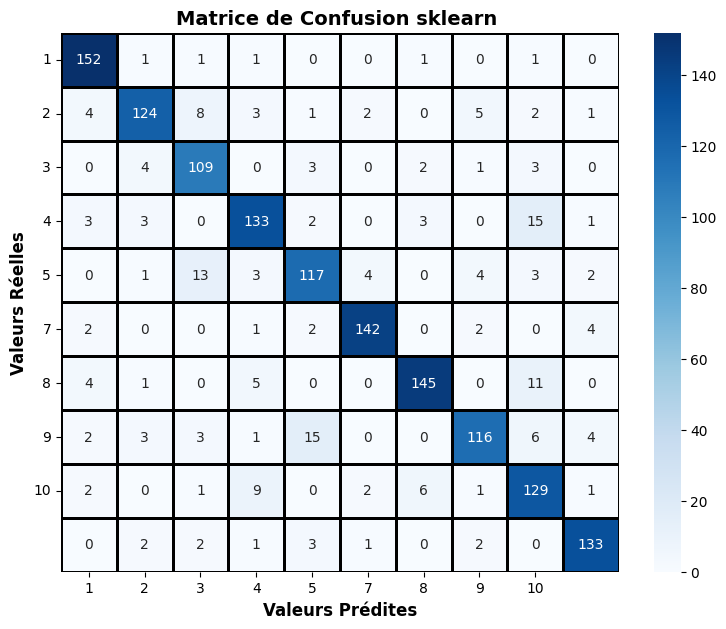

[[152   1   1   1   0   0   1   0   1   0]
 [  4 124   8   3   1   2   0   5   2   1]
 [  0   4 109   0   3   0   2   1   3   0]
 [  3   3   0 133   2   0   3   0  15   1]
 [  0   1  13   3 117   4   0   4   3   2]
 [  2   0   0   1   2 142   0   2   0   4]
 [  4   1   0   5   0   0 145   0  11   0]
 [  2   3   3   1  15   0   0 116   6   4]
 [  2   0   1   9   0   2   6   1 129   1]
 [  0   2   2   1   3   1   0   2   0 133]]
Accuracy sklearn: 0.8666666666666667
Recall  sklearn: 0.8668278154479511
Precision  sklearn: 0.8671673475760457
False Positive Rate  sklearn: 0.01352185609603109
Specificity  sklearn: 0.9864781439039689
------------------------------------------------roc_curve sklearn pour chaque classe----------------------------------------------------


C:\Users\HERO-INFO\AppData\Local\Temp\ipykernel_11492\196614963.py:129: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', n_classes)


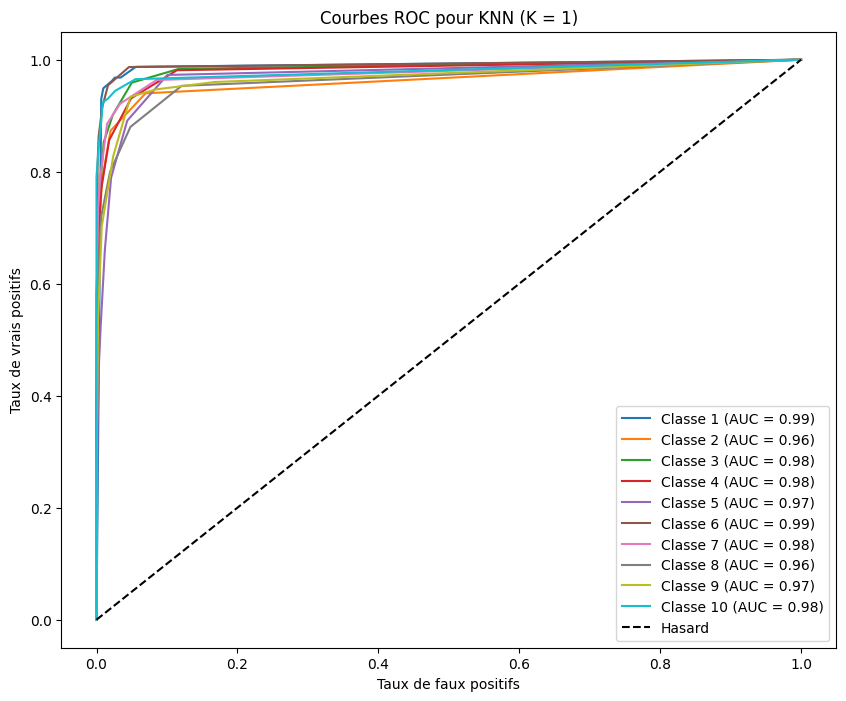

------------------------------------------------roc_curve implemente pour chaque classe----------------------------------------------------


C:\Users\HERO-INFO\AppData\Local\Temp\ipykernel_11492\1799653210.py:68: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.trapz(tpr, fpr)
C:\Users\HERO-INFO\AppData\Local\Temp\ipykernel_11492\196614963.py:167: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', n_classes)


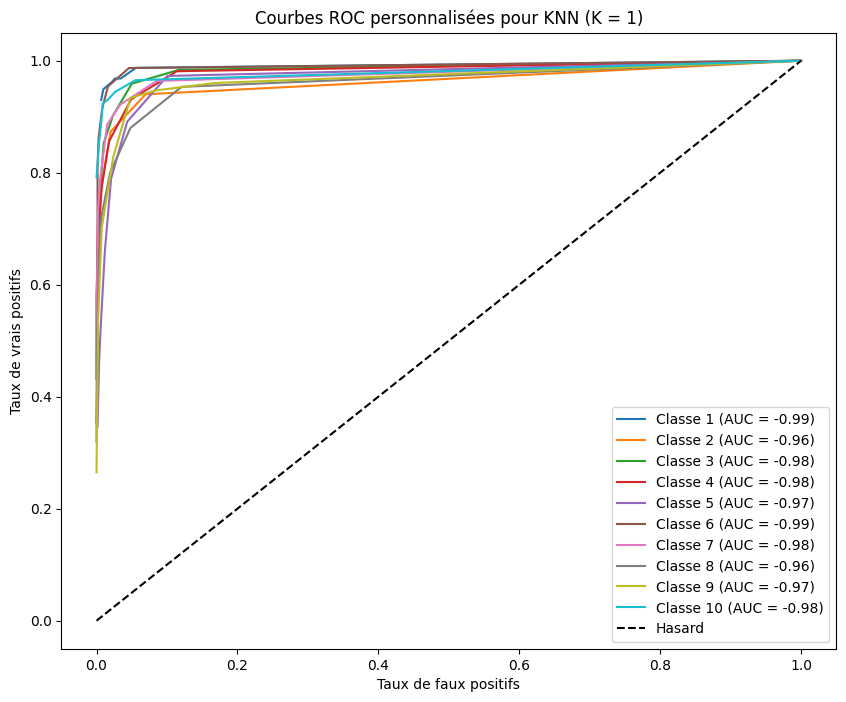

------------------------------------------------Afficher les résultats implémenté-----------------------------------------------------
K = 3:


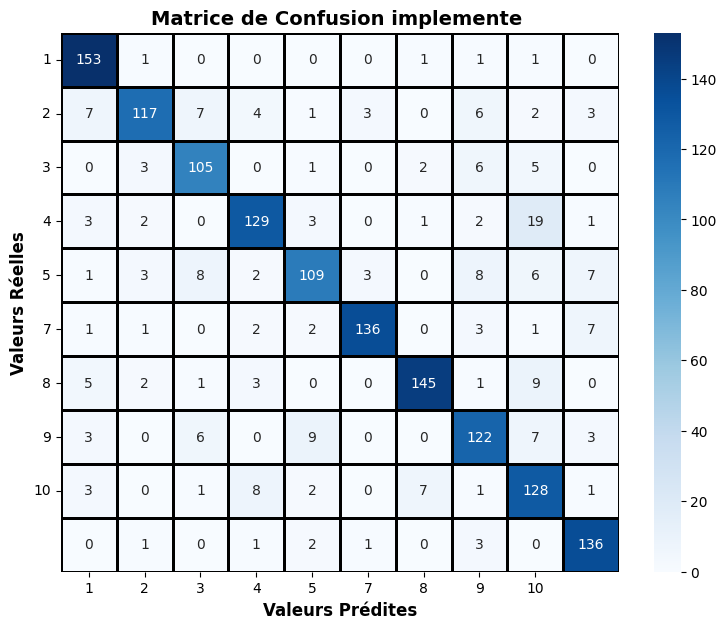

Recall de la classe 1: 0.97
Recall de la classe 2: 0.78
Recall de la classe 3: 0.86
Recall de la classe 4: 0.81
Recall de la classe 5: 0.74
Recall de la classe 6: 0.89
Recall de la classe 7: 0.87
Recall de la classe 8: 0.81
Recall de la classe 9: 0.85
Recall de la classe 10: 0.94
Précision de la classe 1: 0.87
Précision de la classe 2: 0.90
Précision de la classe 3: 0.82
Précision de la classe 4: 0.87
Précision de la classe 5: 0.84
Précision de la classe 7: 0.93
Précision de la classe 8: 0.80
Précision de la classe 9: 0.72
Précision de la classe 10: 0.86
false positive rate de la classe 1: 0.02
false positive rate de la classe 2: 0.01
false positive rate de la classe 3: 0.02
false positive rate de la classe 4: 0.01
false positive rate de la classe 5: 0.01
false positive rate de la classe 7: 0.01
false positive rate de la classe 8: 0.02
false positive rate de la classe 9: 0.04
false positive rate de la classe 10: 0.02
specificity  de la classe 1: 0.98
specificity  de la classe 2: 0.99
s

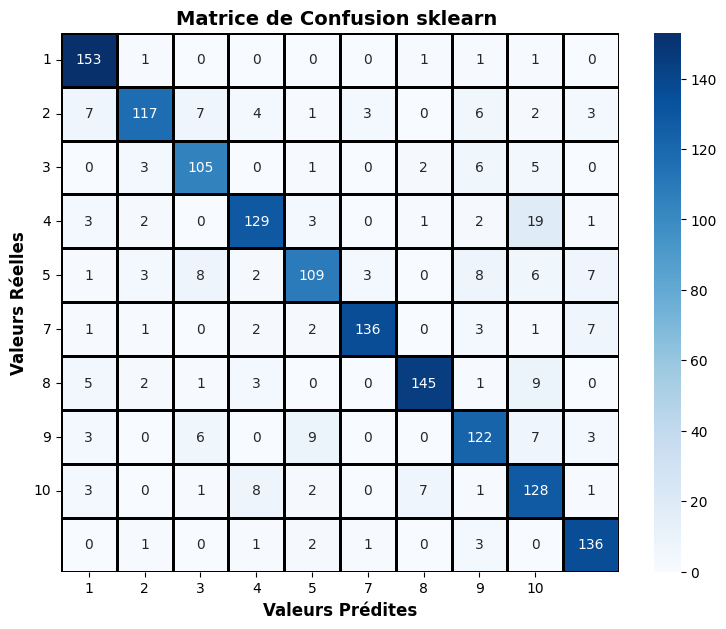

[[153   1   0   0   0   0   1   1   1   0]
 [  7 117   7   4   1   3   0   6   2   3]
 [  0   3 105   0   1   0   2   6   5   0]
 [  3   2   0 129   3   0   1   2  19   1]
 [  1   3   8   2 109   3   0   8   6   7]
 [  1   1   0   2   2 136   0   3   1   7]
 [  5   2   1   3   0   0 145   1   9   0]
 [  3   0   6   0   9   0   0 122   7   3]
 [  3   0   1   8   2   0   7   1 128   1]
 [  0   1   0   1   2   1   0   3   0 136]]
Accuracy sklearn: 0.8533333333333334
Recall  sklearn: 0.8530767391113583
Precision  sklearn: 0.8558146102926351
False Positive Rate  sklearn: 0.014885476553584964
Specificity  sklearn: 0.985114523446415
------------------------------------------------roc_curve sklearn pour chaque classe----------------------------------------------------


C:\Users\HERO-INFO\AppData\Local\Temp\ipykernel_11492\196614963.py:129: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', n_classes)


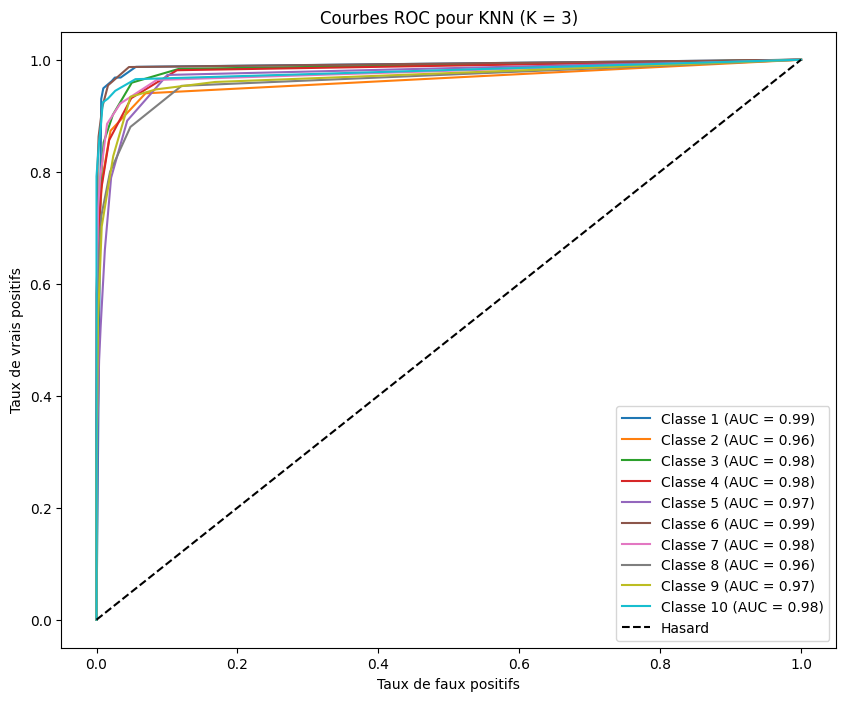

------------------------------------------------roc_curve implemente pour chaque classe----------------------------------------------------


C:\Users\HERO-INFO\AppData\Local\Temp\ipykernel_11492\1799653210.py:68: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.trapz(tpr, fpr)
C:\Users\HERO-INFO\AppData\Local\Temp\ipykernel_11492\196614963.py:167: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', n_classes)


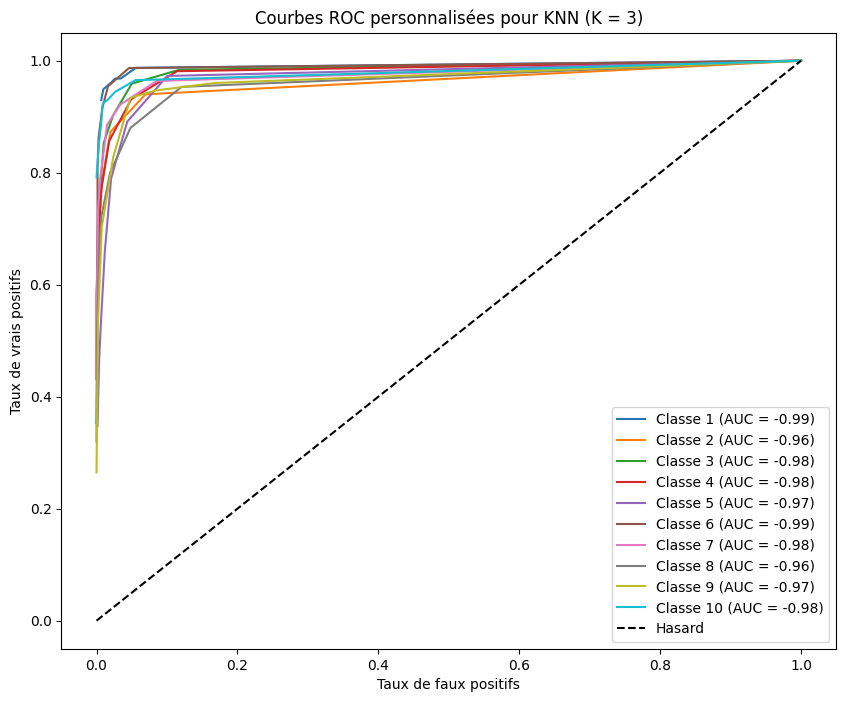

------------------------------------------------Afficher les résultats implémenté-----------------------------------------------------
K = 5:


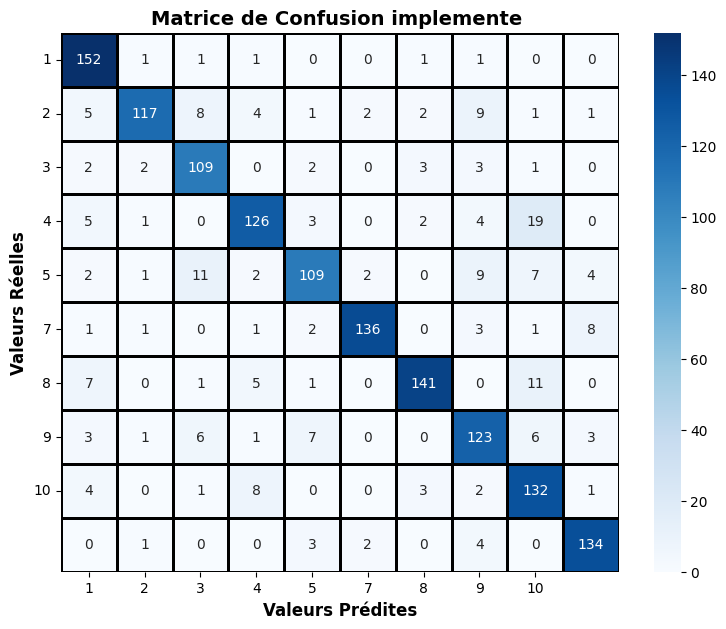

Recall de la classe 1: 0.97
Recall de la classe 2: 0.78
Recall de la classe 3: 0.89
Recall de la classe 4: 0.79
Recall de la classe 5: 0.74
Recall de la classe 6: 0.89
Recall de la classe 7: 0.85
Recall de la classe 8: 0.82
Recall de la classe 9: 0.87
Recall de la classe 10: 0.93
Précision de la classe 1: 0.84
Précision de la classe 2: 0.94
Précision de la classe 3: 0.80
Précision de la classe 4: 0.85
Précision de la classe 5: 0.85
Précision de la classe 7: 0.93
Précision de la classe 8: 0.78
Précision de la classe 9: 0.74
Précision de la classe 10: 0.89
false positive rate de la classe 1: 0.02
false positive rate de la classe 2: 0.01
false positive rate de la classe 3: 0.02
false positive rate de la classe 4: 0.02
false positive rate de la classe 5: 0.01
false positive rate de la classe 7: 0.01
false positive rate de la classe 8: 0.03
false positive rate de la classe 9: 0.03
false positive rate de la classe 10: 0.01
specificity  de la classe 1: 0.98
specificity  de la classe 2: 0.99
s

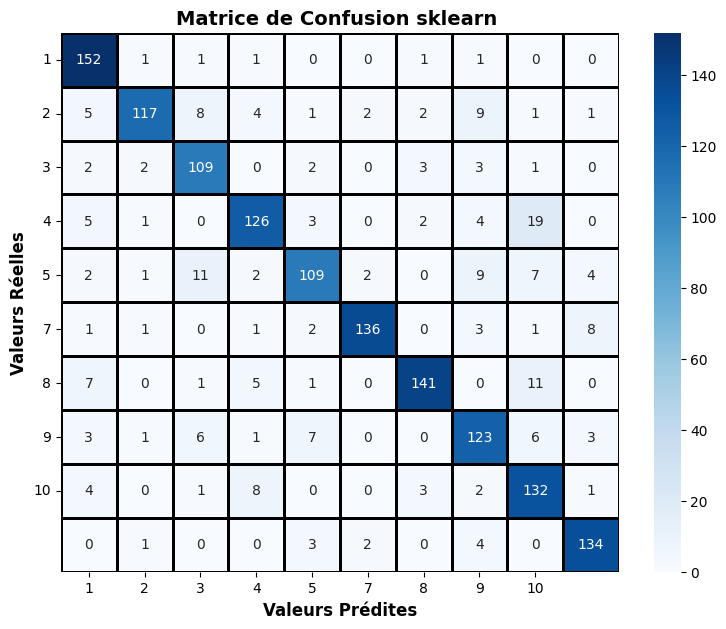

[[152   1   1   1   0   0   1   1   0   0]
 [  5 117   8   4   1   2   2   9   1   1]
 [  2   2 109   0   2   0   3   3   1   0]
 [  5   1   0 126   3   0   2   4  19   0]
 [  2   1  11   2 109   2   0   9   7   4]
 [  1   1   0   1   2 136   0   3   1   8]
 [  7   0   1   5   1   0 141   0  11   0]
 [  3   1   6   1   7   0   0 123   6   3]
 [  4   0   1   8   0   0   3   2 132   1]
 [  0   1   0   0   3   2   0   4   0 134]]
Accuracy sklearn: 0.8526666666666667
Recall  sklearn: 0.8533606308068669
Precision  sklearn: 0.8567162617562165
False Positive Rate  sklearn: 0.014941787799999842
Specificity  sklearn: 0.9850582122
------------------------------------------------roc_curve sklearn pour chaque classe----------------------------------------------------


C:\Users\HERO-INFO\AppData\Local\Temp\ipykernel_11492\196614963.py:129: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', n_classes)


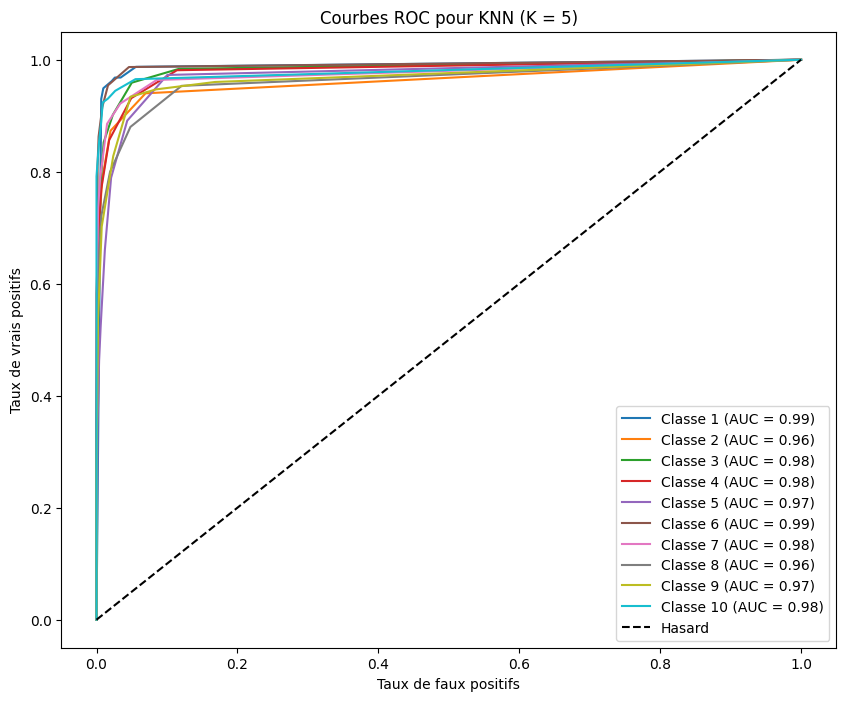

------------------------------------------------roc_curve implemente pour chaque classe----------------------------------------------------


C:\Users\HERO-INFO\AppData\Local\Temp\ipykernel_11492\1799653210.py:68: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.trapz(tpr, fpr)
C:\Users\HERO-INFO\AppData\Local\Temp\ipykernel_11492\196614963.py:167: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', n_classes)


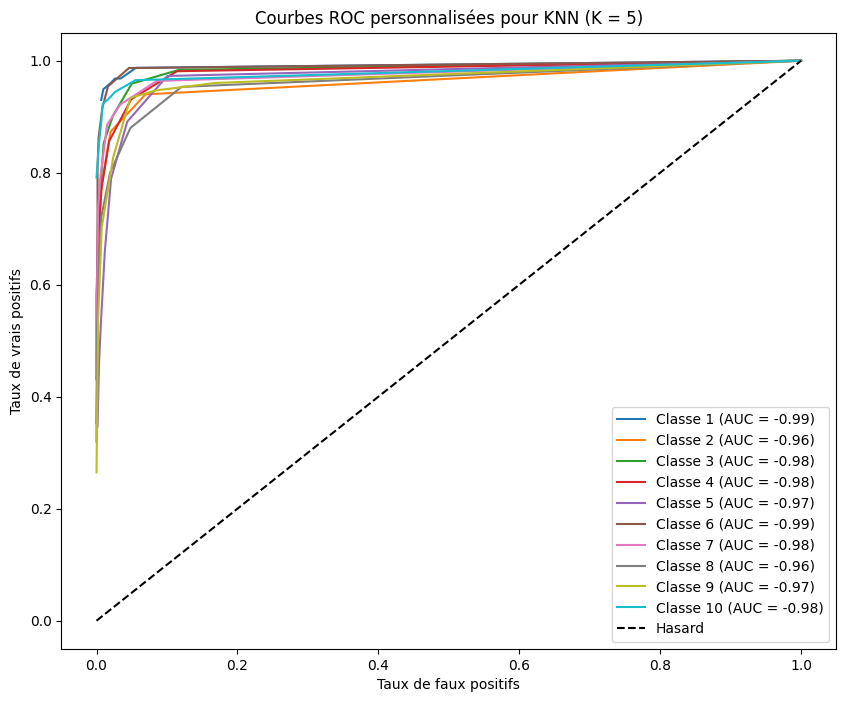

------------------------------------------------Afficher les résultats implémenté-----------------------------------------------------
K = 7:


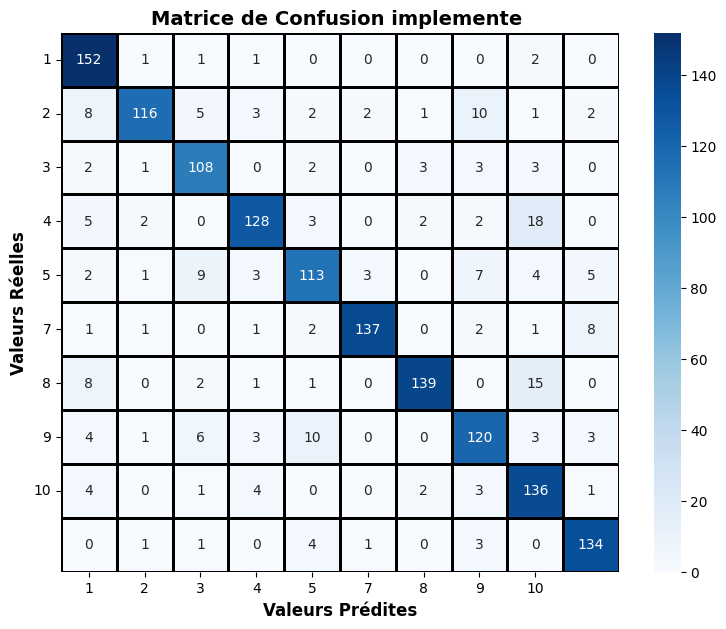

Recall de la classe 1: 0.97
Recall de la classe 2: 0.77
Recall de la classe 3: 0.89
Recall de la classe 4: 0.80
Recall de la classe 5: 0.77
Recall de la classe 6: 0.90
Recall de la classe 7: 0.84
Recall de la classe 8: 0.80
Recall de la classe 9: 0.90
Recall de la classe 10: 0.93
Précision de la classe 1: 0.82
Précision de la classe 2: 0.94
Précision de la classe 3: 0.81
Précision de la classe 4: 0.89
Précision de la classe 5: 0.82
Précision de la classe 7: 0.95
Précision de la classe 8: 0.80
Précision de la classe 9: 0.74
Précision de la classe 10: 0.88
false positive rate de la classe 1: 0.03
false positive rate de la classe 2: 0.01
false positive rate de la classe 3: 0.02
false positive rate de la classe 4: 0.01
false positive rate de la classe 5: 0.02
false positive rate de la classe 7: 0.01
false positive rate de la classe 8: 0.02
false positive rate de la classe 9: 0.03
false positive rate de la classe 10: 0.01
specificity  de la classe 1: 0.97
specificity  de la classe 2: 0.99
s

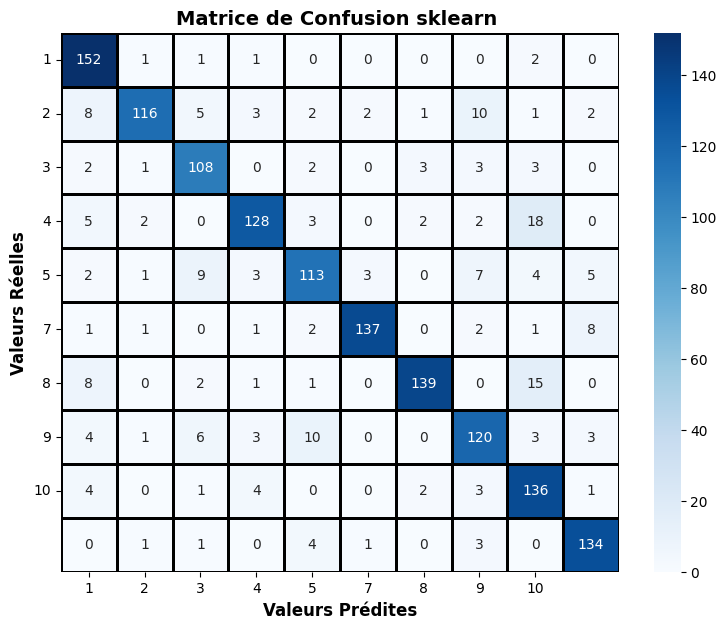

[[152   1   1   1   0   0   0   0   2   0]
 [  8 116   5   3   2   2   1  10   1   2]
 [  2   1 108   0   2   0   3   3   3   0]
 [  5   2   0 128   3   0   2   2  18   0]
 [  2   1   9   3 113   3   0   7   4   5]
 [  1   1   0   1   2 137   0   2   1   8]
 [  8   0   2   1   1   0 139   0  15   0]
 [  4   1   6   3  10   0   0 120   3   3]
 [  4   0   1   4   0   0   2   3 136   1]
 [  0   1   1   0   4   1   0   3   0 134]]
Accuracy sklearn: 0.8553333333333333
Recall  sklearn: 0.8559431625610767
Precision  sklearn: 0.8601031236073675
False Positive Rate  sklearn: 0.01465773413731343
Specificity  sklearn: 0.9853422658626867
------------------------------------------------roc_curve sklearn pour chaque classe----------------------------------------------------


C:\Users\HERO-INFO\AppData\Local\Temp\ipykernel_11492\196614963.py:129: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', n_classes)


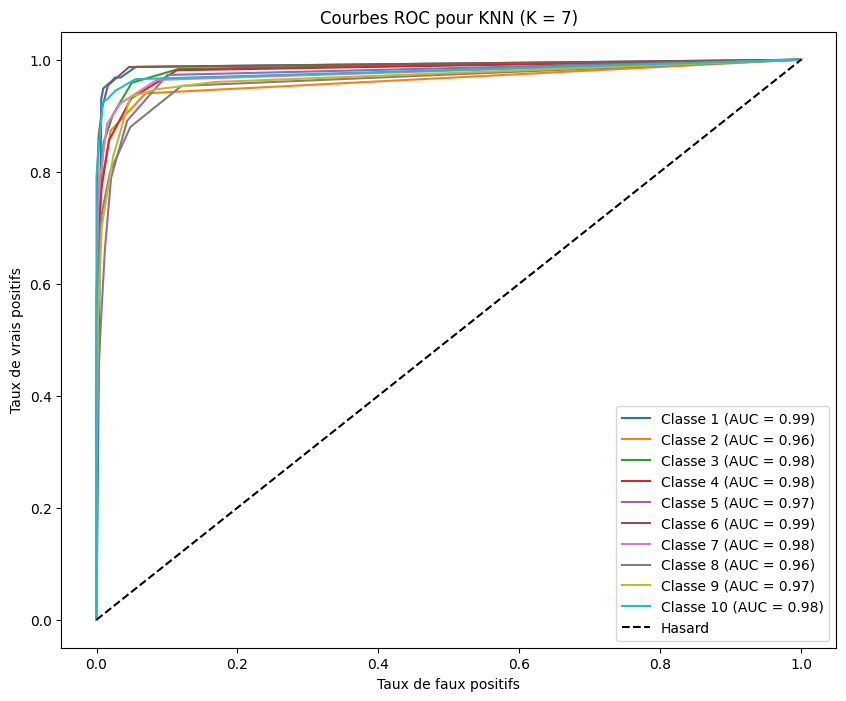

------------------------------------------------roc_curve implemente pour chaque classe----------------------------------------------------


C:\Users\HERO-INFO\AppData\Local\Temp\ipykernel_11492\1799653210.py:68: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.trapz(tpr, fpr)
C:\Users\HERO-INFO\AppData\Local\Temp\ipykernel_11492\196614963.py:167: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', n_classes)


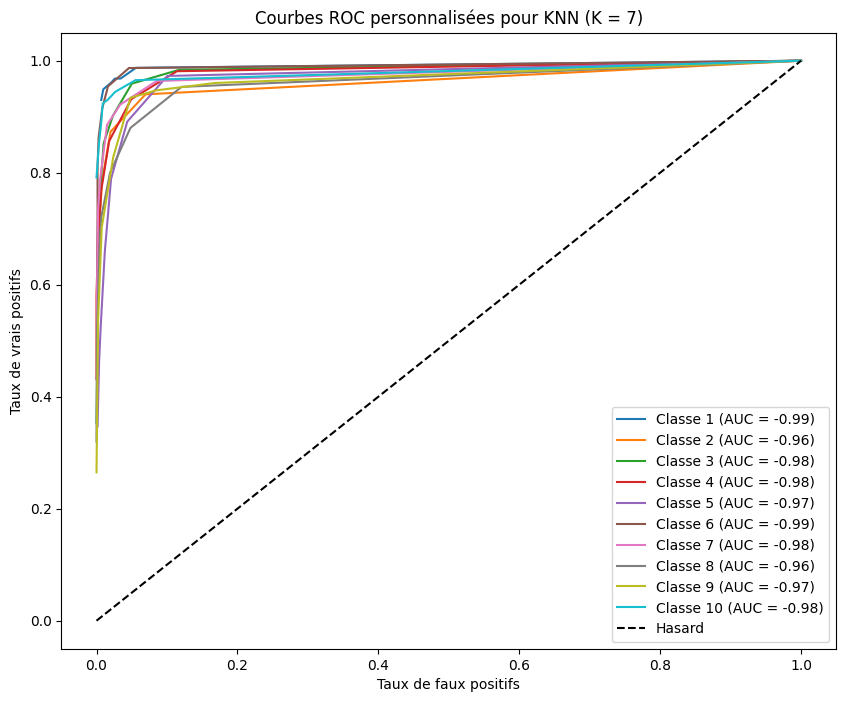

In [24]:
# Définition de la fonction de distance euclidienne
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2)**2))

# Définition de l'algorithme KNN
# Définition de l'algorithme KNN
def k_nearest_neighbors(Xt, Yt, Xtt, k):

    predictions = [] #crée une liste vide qui servira à stocker les résultats des prédictions faites par l'algorithme KNN.

    for test_point in Xtt:
        # Calcul des distances entre le point de test et tous les points dans l'ensemble de données d'entraînement
        distances = [euclidean_distance(test_point, train_point) for train_point in Xt]
        #exemple
        #si on prend xt[[300,25,.......,70],[1,2,.......,2],[1,2,.......,90]](3line,400 colonnes)

        #xtt[[500,2,....70...,400],[1,2,.......,400]](3line,400 colonnes)

        #on va calculer euclidean distance entre le point de test xtt=[1,2,....70...,400] et xtt
        #on commence par xt= xt[[300,25,.......,70]

        #euclidean_distance=racine[(500-300)**2+(2-25)**2..............+(400-70)*2]
        #on continuer pour le rest

        #distances=[ , ,]=>nombre de distance pour chaque test_point est len(xt)
        # Obtenir les indices des K plus proches voisins

        nearest_indices = np.argsort(distances)[:k]#Si on prend k=3, on sélectionne les 3 plus petites distances 

        # Obtenir les étiquettes des K plus proches voisins
        nearest_labels = [Yt[i] for i in nearest_indices]

        # Prédire l'étiquette en effectuant un vote majoritaire parmi les étiquettes des voisins
        predicted_label = max(set(nearest_labels), key=nearest_labels.count)

        predictions.append(predicted_label) #est une liste qui stocke toutes les étiquettes des points testés après classification.


    return predictions

# Tester différentes valeurs de k et évaluer les performances du modèle
K_values = [1, 3, 5, 7]  # Valeurs de k à tester


# Valeur de k à tester
K_values = [1, 3, 5, 7]

# Tester différentes valeurs de k et évaluer les performances du modèle
for k in K_values:
    # Prédire les étiquettes pour les données de test
    y_pred = k_nearest_neighbors(Xt, Yt, Xtt, k)
    # Calculer les métriques de performance
    print("------------------------------------------------Afficher les résultats implémenté-----------------------------------------------------")
    print(f"K = {k}:")
    conf_matrix_imp = confusion_matrix_imp(Ytt, y_pred)

    labels = [1, 2,3,4,5,7,8,9,10]
    plot_confusion_matrix(conf_matrix_imp, labels, title="Matrice de Confusion implemente ")


    acc = accuracy_score_imp(Ytt, y_pred)
   
    recall = recall_score_imp(Ytt, y_pred)
 
    
    precision = precision_score_imp(Ytt, y_pred,labels)  # Étiquette positive pour le chiffre 0

    
    fpr = false_positive_rate_imp(Ytt, y_pred, labels)  # Étiquette positive pour le chiffre 0
    specificity = specificity_score_imp(Ytt, y_pred, labels)  # Étiquette négative pour le chiffre 0
#     roc_fpr, roc_tpr = roc_curve(Ytt, y_pred, positive_label=10)  # Étiquette positive pour le chiffre 0
    
   
    
    print(conf_matrix_imp)
    print(f"Accuracy: {acc}")
    print(f"Recall: {recall}")
    print(f"Precision: {precision}")
    print(f"False Positive Rate: {fpr}")
    print(f"Specificity: {specificity}")

   
    print("------------------------------------------------Afficher les résultats sklearn-----------------------------------------------------")
    print(f"K = {k}:")
    conf_matrix = confusion_matrix(Ytt, y_pred)
    plot_confusion_matrix(conf_matrix_imp, labels, title="Matrice de Confusion sklearn ")
    
    accuracy_sklearn = accuracy_score(Ytt, y_pred)
    precision_sklearn = precision_score(Ytt, y_pred,average="macro")  # Étiquette positive pour le chiffre 0
    recall_sklearn = recall_score(Ytt, y_pred,average="macro")

    fpr_sklearn  = false_positive_rate_sklearn(Ytt, y_pred)  # Étiquette positive pour le chiffre 0

    specificity_sklearn  = specificity_score_sklearn(Ytt, y_pred)  # Étiquette négative pour le chiffre 0"""
    print(conf_matrix)

    print(f"Accuracy sklearn: { accuracy_sklearn}")
    print(f"Recall  sklearn: {recall_sklearn}")
    print(f"Precision  sklearn: {precision_sklearn}")
    print(f"False Positive Rate  sklearn: {fpr_sklearn}")
    print(f"Specificity  sklearn: {specificity_sklearn}")
   
    
    print("------------------------------------------------roc_curve sklearn pour chaque classe----------------------------------------------------")
   # Prédiction des probabilités pour toutes les classes (shape: [n_samples, 10])
    y_score = knn_model.predict_proba(Xtt)

    # Binarisation des étiquettes (Ytt doit contenir 10 classes distinctes)
    classes = np.unique(Ytt)
    y_test_bin = label_binarize(Ytt, classes=classes)
    n_classes = y_test_bin.shape[1]

    # Initialisation des dictionnaires pour stocker FPR, TPR et AUC pour chaque classe
    fpr = {}
    tpr = {}
    roc_auc = {}

    # Calcul de la courbe ROC pour chaque classe
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

     # Optionnel : Calcul de la ROC micro-moyennée (sur l'ensemble des classes)
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Affichage des courbes ROC pour chaque classe
    plt.figure(figsize=(10, 8))
    colors = plt.cm.get_cmap('tab10', n_classes)
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], color=colors(i),
             label=f'Classe {classes[i]} (AUC = {roc_auc[i]:.2f})')

    # Courbe de référence (diagonale)
    plt.plot([0, 1], [0, 1], 'k--', label='Hasard')

    plt.xlabel('Taux de faux positifs')
    plt.ylabel('Taux de vrais positifs')
    plt.title(f"Courbes ROC pour KNN (K = {k})")
    plt.legend(loc="lower right")
    plt.show()
    print("------------------------------------------------roc_curve implemente pour chaque classe----------------------------------------------------")
   # Supposons que knn_model, Xtt et Ytt soient déjà définis.
    # y_score sera de forme (n_samples, n_classes)
    y_score = knn_model.predict_proba(Xtt)

    # Récupération des classes présentes dans Ytt
    classes = np.unique(Ytt)
    n_classes = len(classes)

    # Binarisation des étiquettes
    y_test_bin = label_binarize_custom(Ytt, classes)

    # 4. Calcul et affichage des courbes ROC pour chaque classe
    fpr_dict = {}
    tpr_dict = {}
    roc_auc_dict = {}

    for i in range(n_classes):
        fpr, tpr, thresholds = roc_curve_custom(y_test_bin[:, i], y_score[:, i])
        fpr_dict[i] = fpr
        tpr_dict[i] = tpr
        roc_auc_dict[i] = auc_custom(fpr, tpr)

    # Affichage avec Matplotlib
    plt.figure(figsize=(10, 8))
    colors = plt.cm.get_cmap('tab10', n_classes)
    for i in range(n_classes):
        plt.plot(fpr_dict[i], tpr_dict[i], color=colors(i),
             label=f'Classe {classes[i]} (AUC = {roc_auc_dict[i]:.2f})')

    # Courbe de référence (diagonale)
    plt.plot([0, 1], [0, 1], 'k--', label='Hasard')
    plt.xlabel('Taux de faux positifs')
    plt.ylabel('Taux de vrais positifs')
    plt.title(f"Courbes ROC personnalisées pour KNN (K = {k})")
    plt.legend(loc="lower right")
    plt.show()


    

In [25]:
y_pred

[np.int64(6),
 np.int64(4),
 np.int64(8),
 np.int64(8),
 np.int64(4),
 np.int64(6),
 np.int64(5),
 np.int64(9),
 np.int64(9),
 np.int64(1),
 np.int64(5),
 np.int64(10),
 np.int64(5),
 np.int64(2),
 np.int64(1),
 np.int64(2),
 np.int64(8),
 np.int64(9),
 np.int64(8),
 np.int64(1),
 np.int64(9),
 np.int64(5),
 np.int64(5),
 np.int64(4),
 np.int64(10),
 np.int64(10),
 np.int64(3),
 np.int64(9),
 np.int64(1),
 np.int64(4),
 np.int64(9),
 np.int64(1),
 np.int64(1),
 np.int64(6),
 np.int64(9),
 np.int64(2),
 np.int64(6),
 np.int64(5),
 np.int64(4),
 np.int64(2),
 np.int64(2),
 np.int64(6),
 np.int64(8),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(6),
 np.int64(8),
 np.int64(6),
 np.int64(6),
 np.int64(2),
 np.int64(10),
 np.int64(8),
 np.int64(7),
 np.int64(9),
 np.int64(5),
 np.int64(9),
 np.int64(6),
 np.int64(6),
 np.int64(6),
 np.int64(7),
 np.int64(6),
 np.int64(9),
 np.int64(8),
 np.int64(7),
 np.int64(1),
 np.int64(7),
 np.int64(8),
 np.int64(9),
 np.int64(7),
 np.int64(6),
 n

4


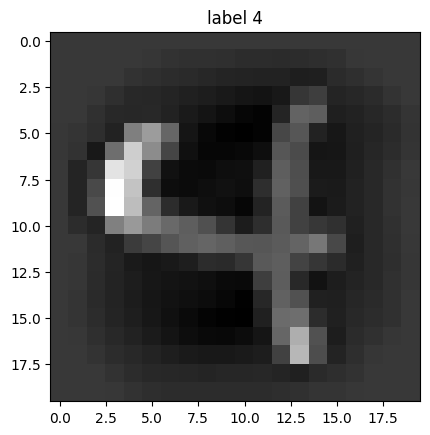

In [26]:
# tester une image
c= 4
print (y_pred[c])
a = Xtt[c,:].reshape((20, 20))
a=np.transpose(a)
plt.title('label '+ str(Ytt[c]))
plt.imshow(a,cmap='gray')

# Méthode 1: MVS
Machine à Vecteurs de Support

SVM:
------------------------------------------------Afficher les résultats implémenté-----------------------------------------------------


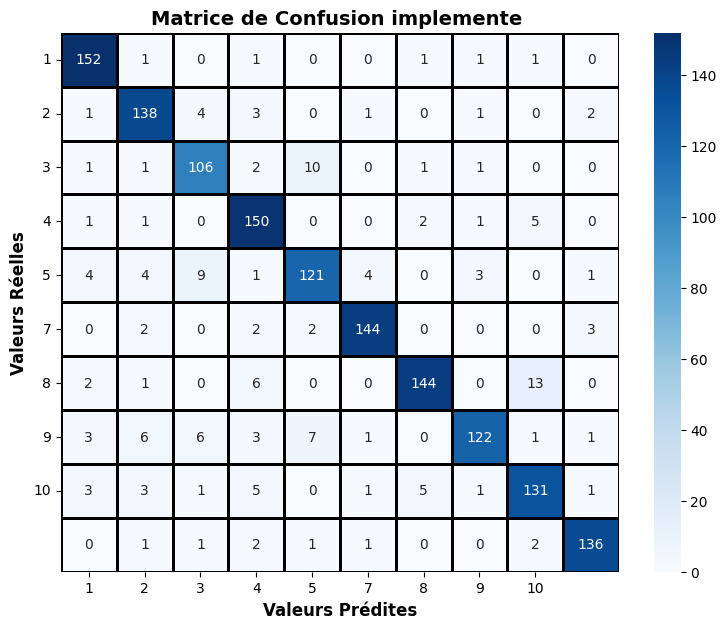

Recall de la classe 1: 0.97
Recall de la classe 2: 0.92
Recall de la classe 3: 0.87
Recall de la classe 4: 0.94
Recall de la classe 5: 0.82
Recall de la classe 6: 0.94
Recall de la classe 7: 0.87
Recall de la classe 8: 0.81
Recall de la classe 9: 0.87
Recall de la classe 10: 0.94
Précision de la classe 1: 0.91
Précision de la classe 2: 0.87
Précision de la classe 3: 0.83
Précision de la classe 4: 0.86
Précision de la classe 5: 0.86
Précision de la classe 7: 0.94
Précision de la classe 8: 0.94
Précision de la classe 9: 0.86
Précision de la classe 10: 0.94
false positive rate de la classe 1: 0.01
false positive rate de la classe 2: 0.01
false positive rate de la classe 3: 0.02
false positive rate de la classe 4: 0.02
false positive rate de la classe 5: 0.01
false positive rate de la classe 7: 0.01
false positive rate de la classe 8: 0.01
false positive rate de la classe 9: 0.02
false positive rate de la classe 10: 0.01
specificity  de la classe 1: 0.99
specificity  de la classe 2: 0.99
s

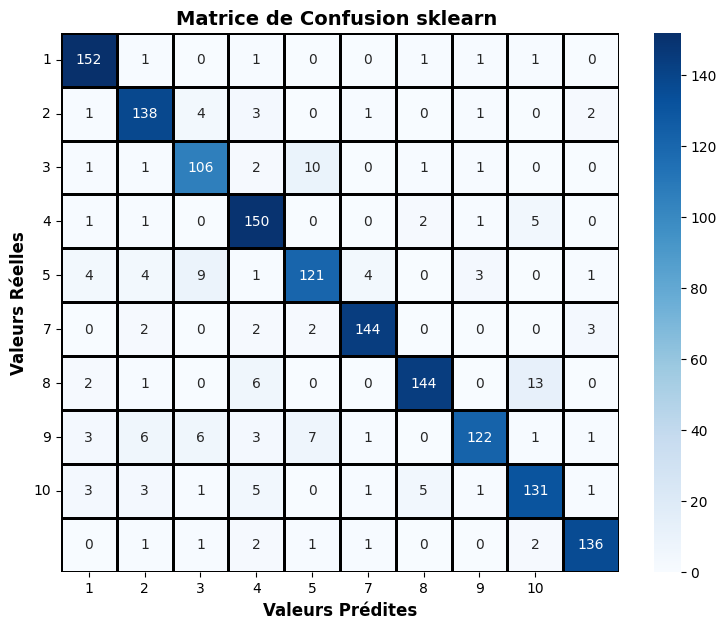

[[152   1   0   1   0   0   1   1   1   0]
 [  1 138   4   3   0   1   0   1   0   2]
 [  1   1 106   2  10   0   1   1   0   0]
 [  1   1   0 150   0   0   2   1   5   0]
 [  4   4   9   1 121   4   0   3   0   1]
 [  0   2   0   2   2 144   0   0   0   3]
 [  2   1   0   6   0   0 144   0  13   0]
 [  3   6   6   3   7   1   0 122   1   1]
 [  3   3   1   5   0   1   5   1 131   1]
 [  0   1   1   2   1   1   0   0   2 136]]
Accuracy sklearn: 0.896
Recall  sklearn: 0.895160837371737
Precision  sklearn: 0.8961201941914189
False Positive Rate  sklearn: 0.010508870708744173
Specificity  sklearn: 0.9894911292912557
------------------------------------------------roc_curve sklearn pour chaque classe----------------------------------------------------


C:\Users\HERO-INFO\AppData\Local\Temp\ipykernel_11492\2005756880.py:87: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', n_classes)


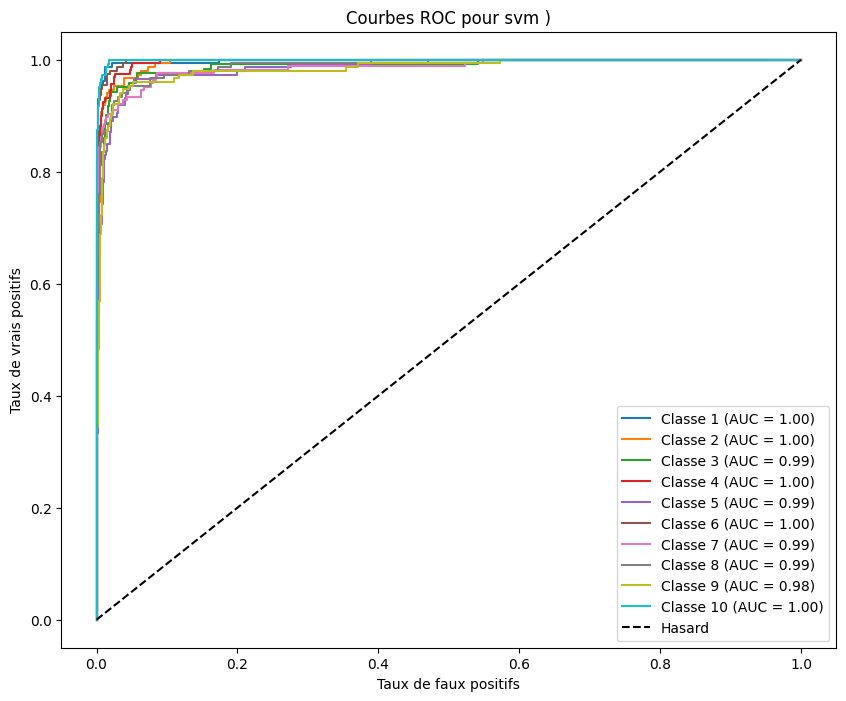

------------------------------------------------roc_curve implemente pour chaque classe----------------------------------------------------


C:\Users\HERO-INFO\AppData\Local\Temp\ipykernel_11492\1799653210.py:68: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.trapz(tpr, fpr)
C:\Users\HERO-INFO\AppData\Local\Temp\ipykernel_11492\2005756880.py:125: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', n_classes)


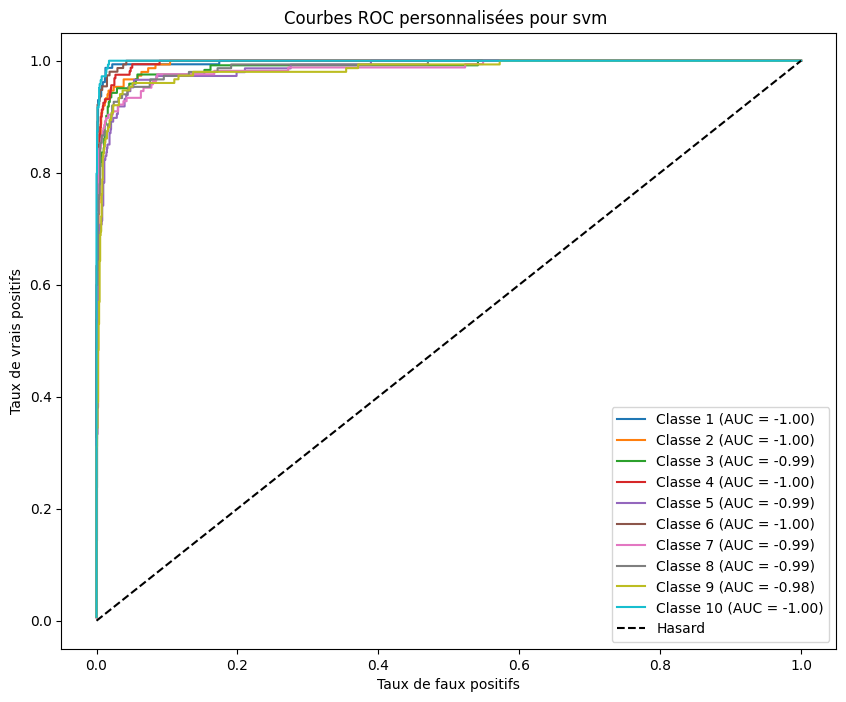

In [27]:
# Création du modèle SVM avec un noyau linéaire
model = svm.SVC(kernel='linear', probability=True)  

# Entrainement du modèle sur les données d'entrainement
model.fit(Xt, Yt)

# Prédiction des étiquettes sur les données de test
y_pred = model.predict(Xtt)

# Calcul des métriques de performance

# Affichage des résultats
print("SVM:")
print("------------------------------------------------Afficher les résultats implémenté-----------------------------------------------------")

conf_matrix_imp = confusion_matrix_imp(Ytt, y_pred)

labels = [1, 2,3,4,5,7,8,9,10]
plot_confusion_matrix(conf_matrix_imp, labels, title="Matrice de Confusion implemente ")


acc = accuracy_score_imp(Ytt, y_pred)
   
recall = recall_score_imp(Ytt, y_pred)
 
    
precision = precision_score_imp(Ytt, y_pred,labels)  # Étiquette positive pour le chiffre 0

    
fpr = false_positive_rate_imp(Ytt, y_pred, labels)  # Étiquette positive pour le chiffre 0
specificity = specificity_score_imp(Ytt, y_pred, labels)  # Étiquette négative pour le chiffre 0
#     roc_fpr, roc_tpr = roc_curve(Ytt, y_pred, positive_label=10)  # Étiquette positive pour le chiffre 0
    
   
    
print(conf_matrix_imp)
print(f"Accuracy: {acc}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"False Positive Rate: {fpr}")
print(f"Specificity: {specificity}")


print("------------------------------------------------Afficher les résultats sklearn-----------------------------------------------------")
conf_matrix = confusion_matrix(Ytt, y_pred)
plot_confusion_matrix(conf_matrix_imp, labels, title="Matrice de Confusion sklearn ")
    
accuracy_sklearn = accuracy_score(Ytt, y_pred)
precision_sklearn = precision_score(Ytt, y_pred,average="macro")  # Étiquette positive pour le chiffre 0
recall_sklearn = recall_score(Ytt, y_pred,average="macro")

fpr_sklearn  = false_positive_rate_sklearn(Ytt, y_pred)  # Étiquette positive pour le chiffre 0

specificity_sklearn  = specificity_score_sklearn(Ytt, y_pred)  # Étiquette négative pour le chiffre 0"""
print(conf_matrix)

print(f"Accuracy sklearn: { accuracy_sklearn}")
print(f"Recall  sklearn: {recall_sklearn}")
print(f"Precision  sklearn: {precision_sklearn}")
print(f"False Positive Rate  sklearn: {fpr_sklearn}")
print(f"Specificity  sklearn: {specificity_sklearn}") 
print("------------------------------------------------roc_curve sklearn pour chaque classe----------------------------------------------------")
# Prédiction des probabilités pour toutes les classes (shape: [n_samples, 10])
y_score = model.predict_proba(Xtt)

# Binarisation des étiquettes (Ytt doit contenir 10 classes distinctes)
classes = np.unique(Ytt)
y_test_bin = label_binarize(Ytt, classes=classes)
n_classes = y_test_bin.shape[1]

# Initialisation des dictionnaires pour stocker FPR, TPR et AUC pour chaque classe
fpr = {}
tpr = {}
roc_auc = {}

# Calcul de la courbe ROC pour chaque classe
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Optionnel : Calcul de la ROC micro-moyennée (sur l'ensemble des classes)
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Affichage des courbes ROC pour chaque classe
plt.figure(figsize=(10, 8))
colors = plt.cm.get_cmap('tab10', n_classes)
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors(i),
        label=f'Classe {classes[i]} (AUC = {roc_auc[i]:.2f})')

# Courbe de référence (diagonale)
plt.plot([0, 1], [0, 1], 'k--', label='Hasard')

plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title(f"Courbes ROC pour svm )")
plt.legend(loc="lower right")
plt.show()
print("------------------------------------------------roc_curve implemente pour chaque classe----------------------------------------------------")
# Supposons que knn_model, Xtt et Ytt soient déjà définis.
# y_score sera de forme (n_samples, n_classes)
y_score = model.predict_proba(Xtt)

# Récupération des classes présentes dans Ytt
classes = np.unique(Ytt)
n_classes = len(classes)

# Binarisation des étiquettes
y_test_bin = label_binarize_custom(Ytt, classes)

# 4. Calcul et affichage des courbes ROC pour chaque classe
fpr_dict = {}
tpr_dict = {}
roc_auc_dict = {}

for i in range(n_classes):
    fpr, tpr, thresholds = roc_curve_custom(y_test_bin[:, i], y_score[:, i])
    fpr_dict[i] = fpr
    tpr_dict[i] = tpr
    roc_auc_dict[i] = auc_custom(fpr, tpr)

# Affichage avec Matplotlib
plt.figure(figsize=(10, 8))
colors = plt.cm.get_cmap('tab10', n_classes)
for i in range(n_classes):
    plt.plot(fpr_dict[i], tpr_dict[i], color=colors(i),
        label=f'Classe {classes[i]} (AUC = {roc_auc_dict[i]:.2f})')

# Courbe de référence (diagonale)
plt.plot([0, 1], [0, 1], 'k--', label='Hasard')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title(f"Courbes ROC personnalisées pour svm ")
plt.legend(loc="lower right")
plt.show()


    


      

In [28]:
y_pred

array([ 6,  4,  8, ..., 10,  3,  4])

8


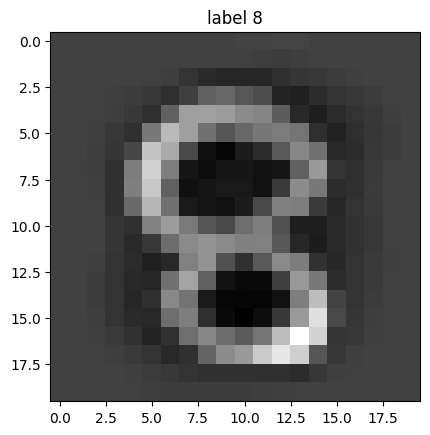

In [29]:
# tester une image
c= 3
print (y_pred[c])
a = Xtt[c,:].reshape((20, 20))
a=np.transpose(a)
plt.title('label '+ str(Ytt[c]))
plt.imshow(a,cmap='gray')

# Méthode 2: Arbres de décision


Decision Tree:
------------------------------------------------Afficher les résultats implémenté-----------------------------------------------------


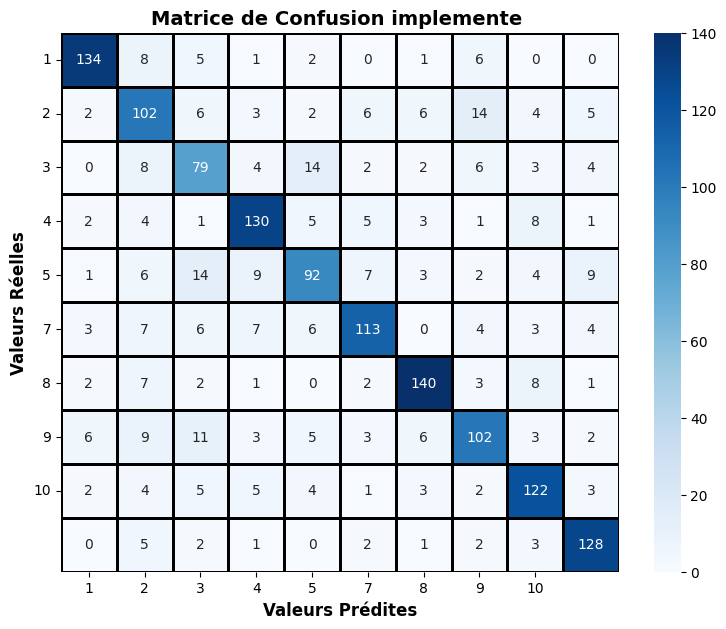

Recall de la classe 1: 0.85
Recall de la classe 2: 0.68
Recall de la classe 3: 0.65
Recall de la classe 4: 0.81
Recall de la classe 5: 0.63
Recall de la classe 6: 0.74
Recall de la classe 7: 0.84
Recall de la classe 8: 0.68
Recall de la classe 9: 0.81
Recall de la classe 10: 0.89
Précision de la classe 1: 0.88
Précision de la classe 2: 0.64
Précision de la classe 3: 0.60
Précision de la classe 4: 0.79
Précision de la classe 5: 0.71
Précision de la classe 7: 0.85
Précision de la classe 8: 0.72
Précision de la classe 9: 0.77
Précision de la classe 10: 0.82
false positive rate de la classe 1: 0.01
false positive rate de la classe 2: 0.04
false positive rate de la classe 3: 0.04
false positive rate de la classe 4: 0.03
false positive rate de la classe 5: 0.03
false positive rate de la classe 7: 0.02
false positive rate de la classe 8: 0.03
false positive rate de la classe 9: 0.03
false positive rate de la classe 10: 0.02
specificity  de la classe 1: 0.99
specificity  de la classe 2: 0.96
s

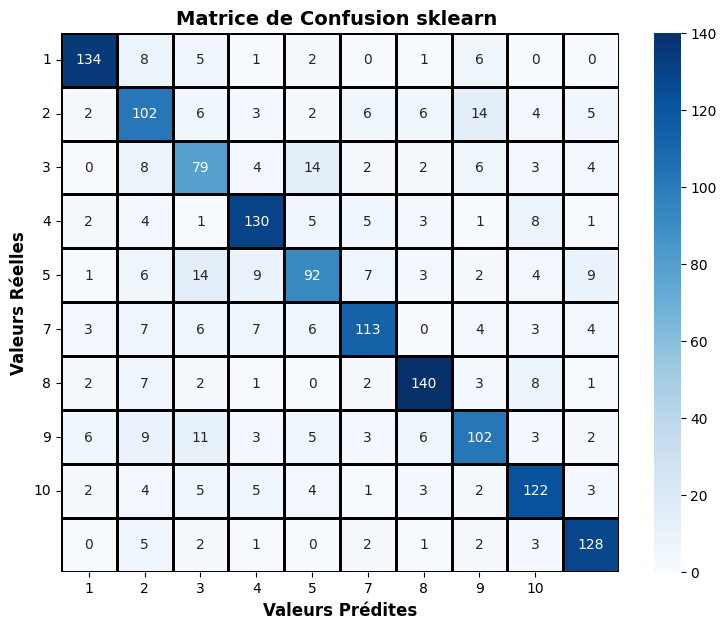

[[134   8   5   1   2   0   1   6   0   0]
 [  2 102   6   3   2   6   6  14   4   5]
 [  0   8  79   4  14   2   2   6   3   4]
 [  2   4   1 130   5   5   3   1   8   1]
 [  1   6  14   9  92   7   3   2   4   9]
 [  3   7   6   7   6 113   0   4   3   4]
 [  2   7   2   1   0   2 140   3   8   1]
 [  6   9  11   3   5   3   6 102   3   2]
 [  2   4   5   5   4   1   3   2 122   3]
 [  0   5   2   1   0   2   1   2   3 128]]
Accuracy sklearn: 0.7613333333333333
Recall  sklearn: 0.7578166002691598
Precision  sklearn: 0.7578159287298589
False Positive Rate  sklearn: 0.024495024125287684
Specificity  sklearn: 0.9755049758747123
------------------------------------------------roc_curve sklearn pour chaque classe----------------------------------------------------


C:\Users\HERO-INFO\AppData\Local\Temp\ipykernel_11492\1433258302.py:80: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', n_classes)


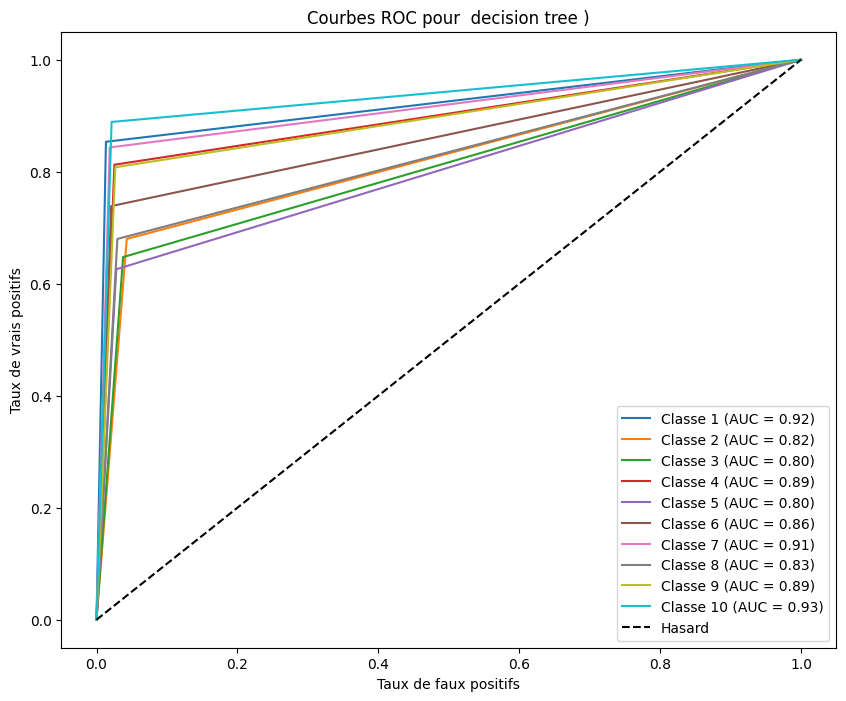

------------------------------------------------roc_curve implemente pour chaque classe----------------------------------------------------


C:\Users\HERO-INFO\AppData\Local\Temp\ipykernel_11492\1799653210.py:68: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.trapz(tpr, fpr)
C:\Users\HERO-INFO\AppData\Local\Temp\ipykernel_11492\1433258302.py:118: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', n_classes)


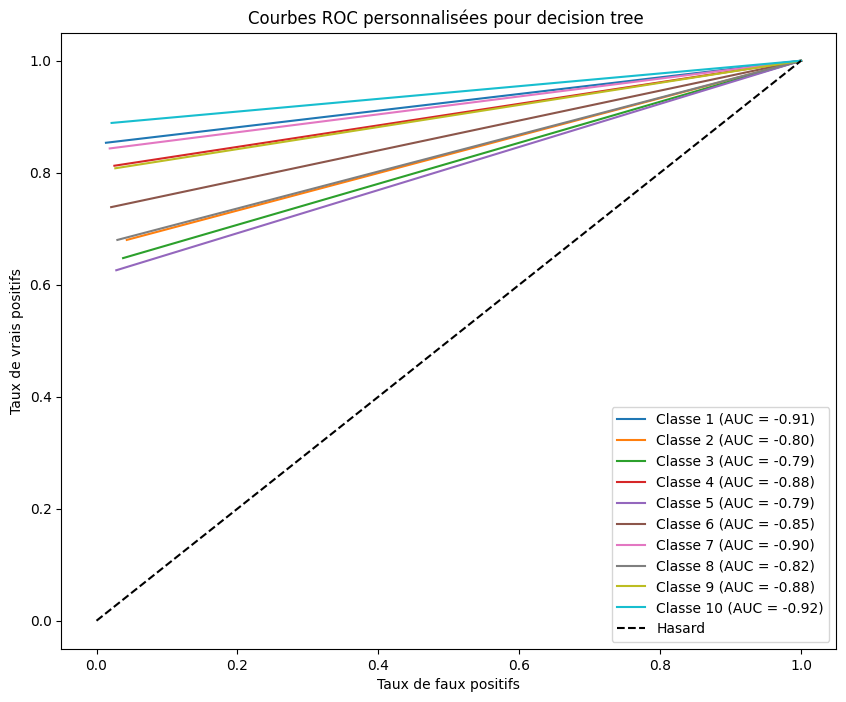

In [30]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(Xt, Yt)
y_pred = model.predict(Xtt)

# Affichage des résultats
print("Decision Tree:")
print("------------------------------------------------Afficher les résultats implémenté-----------------------------------------------------")

conf_matrix_imp = confusion_matrix_imp(Ytt, y_pred)

labels = [1, 2,3,4,5,7,8,9,10]
plot_confusion_matrix(conf_matrix_imp, labels, title="Matrice de Confusion implemente ")

acc = accuracy_score_imp(Ytt, y_pred)
   
recall = recall_score_imp(Ytt, y_pred)
 
    
precision = precision_score_imp(Ytt, y_pred,labels)  # Étiquette positive pour le chiffre 0

    
fpr = false_positive_rate_imp(Ytt, y_pred, labels)  # Étiquette positive pour le chiffre 0
specificity = specificity_score_imp(Ytt, y_pred, labels)  # Étiquette négative pour le chiffre 0
# roc_fpr, roc_tpr = roc_curve(Ytt, y_pred, positive_label=10)  # Étiquette positive pour le chiffre 0
    
print(conf_matrix_imp)
print(f"Accuracy: {acc}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"False Positive Rate: {fpr}")
print(f"Specificity: {specificity}")


print("------------------------------------------------Afficher les résultats sklearn-----------------------------------------------------")
conf_matrix = confusion_matrix(Ytt, y_pred)
plot_confusion_matrix(conf_matrix_imp, labels, title="Matrice de Confusion sklearn ")
    
accuracy_sklearn = accuracy_score(Ytt, y_pred)
precision_sklearn = precision_score(Ytt, y_pred,average="macro")  # Étiquette positive pour le chiffre 0
recall_sklearn = recall_score(Ytt, y_pred,average="macro")

fpr_sklearn  = false_positive_rate_sklearn(Ytt, y_pred)  # Étiquette positive pour le chiffre 0

specificity_sklearn  = specificity_score_sklearn(Ytt, y_pred)  # Étiquette négative pour le chiffre 0"""
print(conf_matrix)

print(f"Accuracy sklearn: { accuracy_sklearn}")
print(f"Recall  sklearn: {recall_sklearn}")
print(f"Precision  sklearn: {precision_sklearn}")
print(f"False Positive Rate  sklearn: {fpr_sklearn}")
print(f"Specificity  sklearn: {specificity_sklearn}")
   
print("------------------------------------------------roc_curve sklearn pour chaque classe----------------------------------------------------")
# Prédiction des probabilités pour toutes les classes (shape: [n_samples, 10])
y_score = model.predict_proba(Xtt)

# Binarisation des étiquettes (Ytt doit contenir 10 classes distinctes)
classes = np.unique(Ytt)
y_test_bin = label_binarize(Ytt, classes=classes)
n_classes = y_test_bin.shape[1]

# Initialisation des dictionnaires pour stocker FPR, TPR et AUC pour chaque classe
fpr = {}
tpr = {}
roc_auc = {}

# Calcul de la courbe ROC pour chaque classe
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Optionnel : Calcul de la ROC micro-moyennée (sur l'ensemble des classes)
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Affichage des courbes ROC pour chaque classe
plt.figure(figsize=(10, 8))
colors = plt.cm.get_cmap('tab10', n_classes)
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors(i),
        label=f'Classe {classes[i]} (AUC = {roc_auc[i]:.2f})')

# Courbe de référence (diagonale)
plt.plot([0, 1], [0, 1], 'k--', label='Hasard')

plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title(f"Courbes ROC pour  decision tree )")
plt.legend(loc="lower right")
plt.show()
print("------------------------------------------------roc_curve implemente pour chaque classe----------------------------------------------------")
# Supposons que knn_model, Xtt et Ytt soient déjà définis.
# y_score sera de forme (n_samples, n_classes)
y_score = model.predict_proba(Xtt)

# Récupération des classes présentes dans Ytt
classes = np.unique(Ytt)
n_classes = len(classes)

# Binarisation des étiquettes
y_test_bin = label_binarize_custom(Ytt, classes)

# 4. Calcul et affichage des courbes ROC pour chaque classe
fpr_dict = {}
tpr_dict = {}
roc_auc_dict = {}

for i in range(n_classes):
    fpr, tpr, thresholds = roc_curve_custom(y_test_bin[:, i], y_score[:, i])
    fpr_dict[i] = fpr
    tpr_dict[i] = tpr
    roc_auc_dict[i] = auc_custom(fpr, tpr)

# Affichage avec Matplotlib
plt.figure(figsize=(10, 8))
colors = plt.cm.get_cmap('tab10', n_classes)
for i in range(n_classes):
    plt.plot(fpr_dict[i], tpr_dict[i], color=colors(i),
        label=f'Classe {classes[i]} (AUC = {roc_auc_dict[i]:.2f})')

# Courbe de référence (diagonale)
plt.plot([0, 1], [0, 1], 'k--', label='Hasard')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title(f"Courbes ROC personnalisées pour decision tree ")
plt.legend(loc="lower right")
plt.show()


In [31]:
y_pred

array([ 6,  4,  8, ..., 10,  9,  4])

8


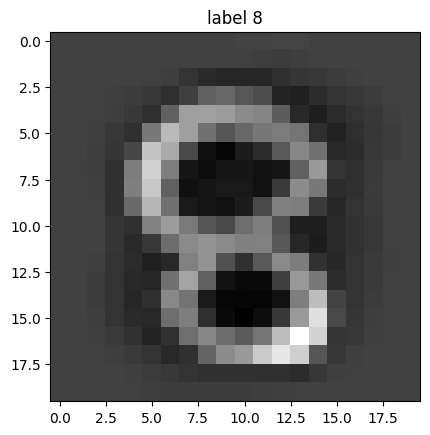

In [32]:
# tester une image
c= 3
print (y_pred[c])
a = Xtt[c,:].reshape((20, 20))
a=np.transpose(a)
plt.title('label '+ str(Ytt[c]))
plt.imshow(a,cmap='gray')

# Méthode 3: RN 
Réseaux de neurones Perceptron

MLP:
------------------------------------------------Afficher les résultats implémenté-----------------------------------------------------


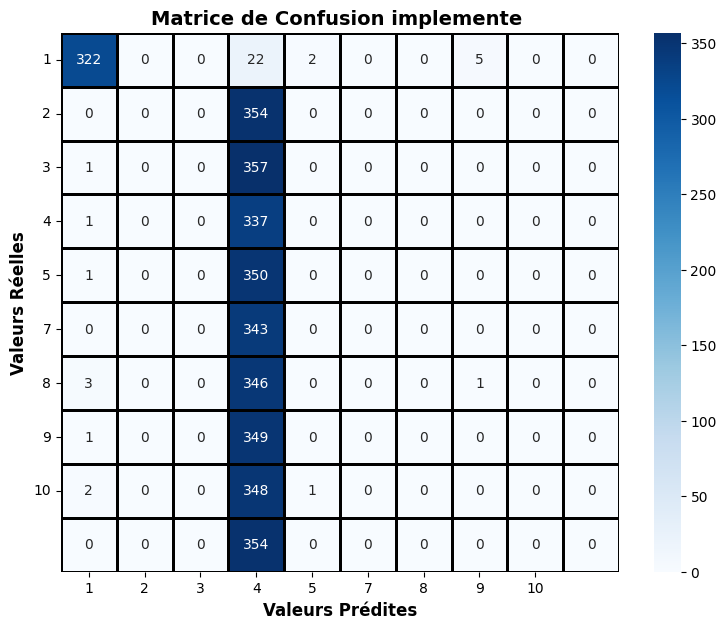

Recall de la classe 1: 0.92
Recall de la classe 2: 0.00
Recall de la classe 3: 0.00
Recall de la classe 4: 1.00
Recall de la classe 5: 0.00
Recall de la classe 6: 0.00
Recall de la classe 7: 0.00
Recall de la classe 8: 0.00
Recall de la classe 9: 0.00
Recall de la classe 10: 0.00
Précision de la classe 1: 0.97
Précision de la classe 2: 0.00
Précision de la classe 3: 0.00
Précision de la classe 4: 0.11
Précision de la classe 5: 0.00
Précision de la classe 7: 0.00
Précision de la classe 8: 0.00
Précision de la classe 9: 0.00
Précision de la classe 10: 0.00
false positive rate de la classe 1: 0.00
false positive rate de la classe 2: 0.00
false positive rate de la classe 3: 0.00
false positive rate de la classe 4: 0.89
false positive rate de la classe 5: 0.00
false positive rate de la classe 7: 0.00
false positive rate de la classe 8: 0.00
false positive rate de la classe 9: 0.00
false positive rate de la classe 10: 0.00
specificity  de la classe 1: 1.00
specificity  de la classe 2: 1.00
s

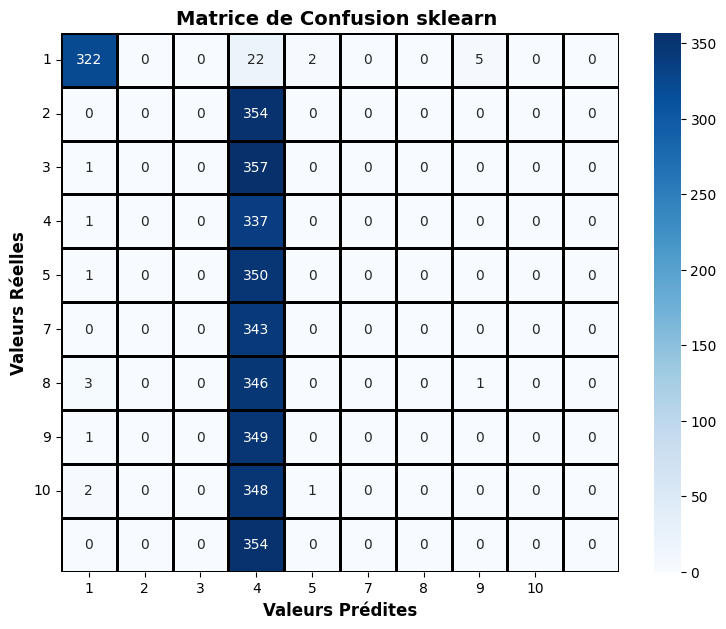

c:\Users\HERO-INFO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HERO-INFO\AppData\Local\Temp\ipykernel_11492\4246190711.py:87: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', n_classes)


[[322   0   0  22   2   0   0   5   0   0]
 [  0   0   0 354   0   0   0   0   0   0]
 [  1   0   0 357   0   0   0   0   0   0]
 [  1   0   0 337   0   0   0   0   0   0]
 [  1   0   0 350   0   0   0   0   0   0]
 [  0   0   0 343   0   0   0   0   0   0]
 [  3   0   0 346   0   0   0   1   0   0]
 [  1   0   0 349   0   0   0   0   0   0]
 [  2   0   0 348   1   0   0   0   0   0]
 [  0   0   0 354   0   0   0   0   0   0]]
Accuracy sklearn: 0.18828571428571428
Recall  sklearn: 0.19144203374972607
Precision  sklearn: 0.10794552372939692
False Positive Rate  sklearn: 0.08122523014139907
Specificity  sklearn: 0.9187747698586008
------------------------------------------------roc_curve sklearn pour chaque classe----------------------------------------------------


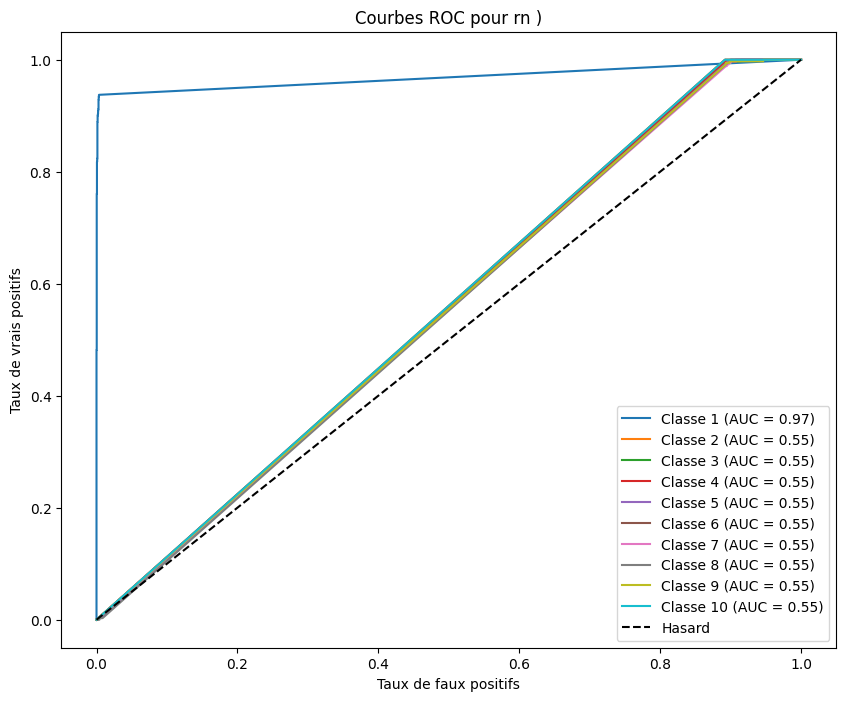

------------------------------------------------roc_curve implemente pour chaque classe----------------------------------------------------


C:\Users\HERO-INFO\AppData\Local\Temp\ipykernel_11492\1799653210.py:68: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.trapz(tpr, fpr)
C:\Users\HERO-INFO\AppData\Local\Temp\ipykernel_11492\4246190711.py:125: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', n_classes)


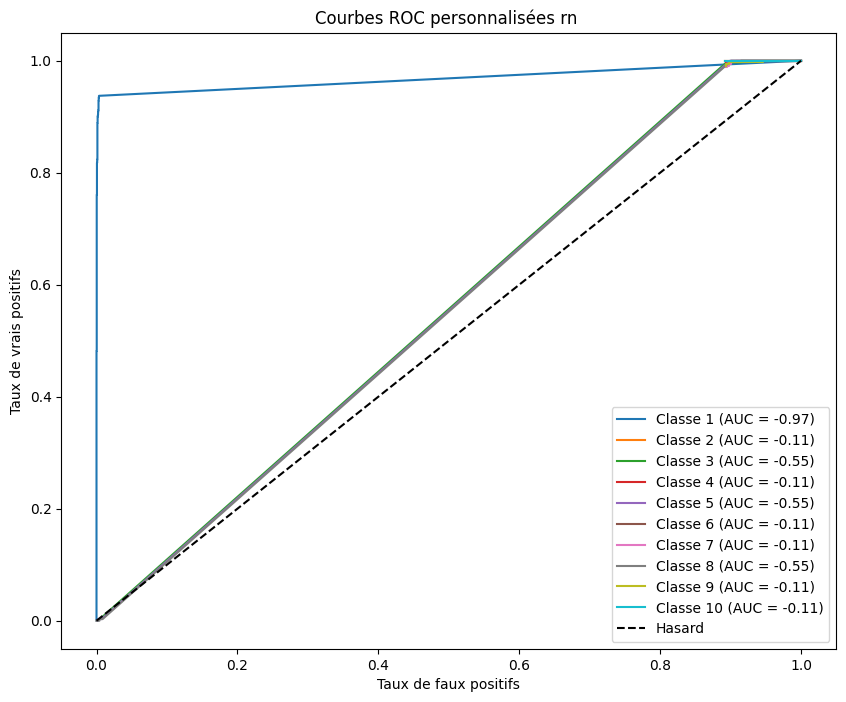

In [33]:
model = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(25),max_iter=100000)
Xt, Xtt, Yt, Ytt = train_test_split(X, Y, random_state=0, test_size=0.7)
model.fit(Xt, Yt)


model = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(25), max_iter=100000)
model.fit(Xt, Yt)
y_pred = model.predict(Xtt)

# Calcul des métriques de performance
# Affichage des résultats
print("MLP:")
print("------------------------------------------------Afficher les résultats implémenté-----------------------------------------------------")

conf_matrix_imp = confusion_matrix_imp(Ytt, y_pred)

labels = [1, 2,3,4,5,7,8,9,10]
plot_confusion_matrix(conf_matrix_imp, labels, title="Matrice de Confusion implemente ")


acc = accuracy_score_imp(Ytt, y_pred)
   
recall = recall_score_imp(Ytt, y_pred)
 
    
precision = precision_score_imp(Ytt, y_pred,labels)  # Étiquette positive pour le chiffre 0

    
fpr = false_positive_rate_imp(Ytt, y_pred, labels)  # Étiquette positive pour le chiffre 0
specificity = specificity_score_imp(Ytt, y_pred, labels)  # Étiquette négative pour le chiffre 0
#     roc_fpr, roc_tpr = roc_curve(Ytt, y_pred, positive_label=10)  # Étiquette positive pour le chiffre 0
    
   
    
print(conf_matrix_imp)
print(f"Accuracy: {acc}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"False Positive Rate: {fpr}")
print(f"Specificity: {specificity}")


print("------------------------------------------------Afficher les résultats sklearn-----------------------------------------------------")
conf_matrix = confusion_matrix(Ytt, y_pred)
plot_confusion_matrix(conf_matrix_imp, labels, title="Matrice de Confusion sklearn ")
    
accuracy_sklearn = accuracy_score(Ytt, y_pred)
precision_sklearn = precision_score(Ytt, y_pred,average="macro")  # Étiquette positive pour le chiffre 0
recall_sklearn = recall_score(Ytt, y_pred,average="macro")

fpr_sklearn  = false_positive_rate_sklearn(Ytt, y_pred)  # Étiquette positive pour le chiffre 0

specificity_sklearn  = specificity_score_sklearn(Ytt, y_pred)  # Étiquette négative pour le chiffre 0"""
print(conf_matrix)

print(f"Accuracy sklearn: { accuracy_sklearn}")
print(f"Recall  sklearn: {recall_sklearn}")
print(f"Precision  sklearn: {precision_sklearn}")
print(f"False Positive Rate  sklearn: {fpr_sklearn}")
print(f"Specificity  sklearn: {specificity_sklearn}")

print("------------------------------------------------roc_curve sklearn pour chaque classe----------------------------------------------------")
# Prédiction des probabilités pour toutes les classes (shape: [n_samples, 10])
y_score = model.predict_proba(Xtt)

# Binarisation des étiquettes (Ytt doit contenir 10 classes distinctes)
classes = np.unique(Ytt)
y_test_bin = label_binarize(Ytt, classes=classes)
n_classes = y_test_bin.shape[1]

# Initialisation des dictionnaires pour stocker FPR, TPR et AUC pour chaque classe
fpr = {}
tpr = {}
roc_auc = {}

# Calcul de la courbe ROC pour chaque classe
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Optionnel : Calcul de la ROC micro-moyennée (sur l'ensemble des classes)
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Affichage des courbes ROC pour chaque classe
plt.figure(figsize=(10, 8))
colors = plt.cm.get_cmap('tab10', n_classes)
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors(i),
        label=f'Classe {classes[i]} (AUC = {roc_auc[i]:.2f})')

# Courbe de référence (diagonale)
plt.plot([0, 1], [0, 1], 'k--', label='Hasard')

plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title(f"Courbes ROC pour rn )")
plt.legend(loc="lower right")
plt.show()
print("------------------------------------------------roc_curve implemente pour chaque classe----------------------------------------------------")
# Supposons que knn_model, Xtt et Ytt soient déjà définis.
# y_score sera de forme (n_samples, n_classes)
y_score = model.predict_proba(Xtt)

# Récupération des classes présentes dans Ytt
classes = np.unique(Ytt)
n_classes = len(classes)

# Binarisation des étiquettes
y_test_bin = label_binarize_custom(Ytt, classes)

# 4. Calcul et affichage des courbes ROC pour chaque classe
fpr_dict = {}
tpr_dict = {}
roc_auc_dict = {}

for i in range(n_classes):
    fpr, tpr, thresholds = roc_curve_custom(y_test_bin[:, i], y_score[:, i])
    fpr_dict[i] = fpr
    tpr_dict[i] = tpr
    roc_auc_dict[i] = auc_custom(fpr, tpr)

# Affichage avec Matplotlib
plt.figure(figsize=(10, 8))
colors = plt.cm.get_cmap('tab10', n_classes)
for i in range(n_classes):
    plt.plot(fpr_dict[i], tpr_dict[i], color=colors(i),
        label=f'Classe {classes[i]} (AUC = {roc_auc_dict[i]:.2f})')

# Courbe de référence (diagonale)
plt.plot([0, 1], [0, 1], 'k--', label='Hasard')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title(f"Courbes ROC personnalisées rn ")
plt.legend(loc="lower right")
plt.show()


   

      



In [34]:
y_pred

array([4, 4, 4, ..., 4, 4, 1])

In [35]:
# Choisir un image de test 
c=0

In [36]:
model.predict([Xtt[c,:]])

array([4])

In [37]:
# pour ROC, il faudra les probabilités:
model.predict_proba([Xtt[c,:]])

array([[0.03953025, 0.10846671, 0.10094501, 0.11608239, 0.10919397,
        0.10493725, 0.10824466, 0.09999676, 0.10545638, 0.10714662]])

Afficher l'image testée

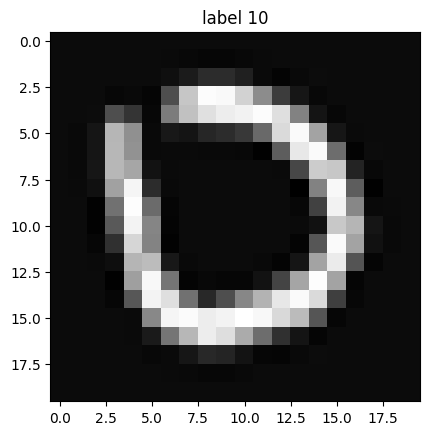

In [38]:
a = Xtt[c,:].reshape((20, 20))
a=np.transpose(a)
plt.title('label '+ str(Ytt[c]))
plt.imshow(a,cmap='gray')

# Méthode 4: RNC
Réseaux de Neurones Convolutifs

# Appliquer les métriques implementées pour voir le résultat